In [17]:
library(tidyr)
library(dplyr)
library(ggiraphExtra)
library(ggplot2)
library(grafify)
library(patchwork)
library(facefuns)

Warning message:
“package ‘ggiraphExtra’ was built under R version 4.1.2”


#### Figure 2B

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”



	Wilcoxon rank sum test with continuity correction

data:  milkweightlbs by disease
W = 3665800, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  cells by disease
W = 1844448, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


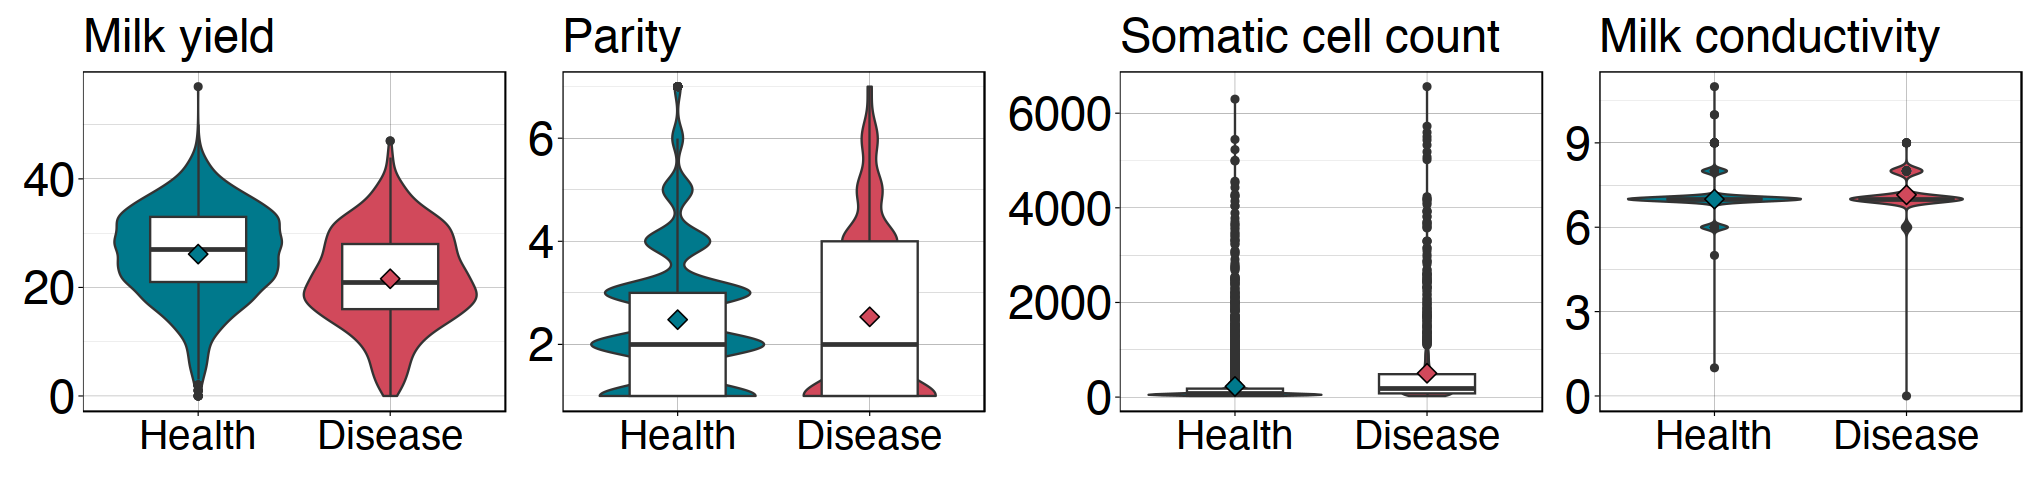

In [2]:
main_theme = theme_linedraw() +
  theme(legend.position = "none",
        plot.title = element_text(size = 28),
        axis.title.x = element_text(size = 0, color = "black", hjust = 0.5),
        axis.title.y = element_text(size = 0,color = "black", hjust = 0.5),
        axis.ticks = element_line(color = "black"), 
        axis.text.y = element_text(color = "black", size = 28),
        axis.text.x = element_text(color = "black", size = 24)) 

data <- read.csv('./JM006_0901_whole.csv', sep = ",", header = T, row.names = NULL)
data <- subset(data, select = c('disease', 'milkweightlbs', 'parity', 'cells', 'conductivity'))
data <- na.omit(data)
data$disease <- ifelse(data$disease == 1, "Disease", "Health")
data$disease <- factor(data$disease, levels=c("Health", "Disease"))

p1 <- ggplot(data, aes(x=disease, y=milkweightlbs, fill=disease)) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  scale_fill_manual(values=c('#00798c', '#d1495b')) + 
  ggtitle("Milk yield") +
  main_theme

p2 <- ggplot(data, aes(x=disease, y=parity, fill=disease)) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  scale_fill_manual(values=c('#00798c', '#d1495b')) + 
  ggtitle("Parity") +
  main_theme

p3 <- ggplot(data, aes(x=disease, y=cells, fill=disease)) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  scale_fill_manual(values=c('#00798c', '#d1495b')) + 
  ggtitle("Somatic cell count") +
  main_theme

p4 <- ggplot(data, aes(x=disease, y=conductivity, fill=disease)) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  scale_fill_manual(values=c('#00798c', '#d1495b')) + 
  ggtitle("Milk conductivity") +
  main_theme

options(repr.plot.width=17, repr.plot.height=4) 
p1 + p2 + p3 + p4 + plot_layout(nrow = 1)

wilcox.test(milkweightlbs ~ disease, data=data) 
wilcox.test(cells ~ disease, data=data)

#### Figure 2C

In [3]:
center_scale <- function(x) {
    scale(x, scale = TRUE)
}

spc <- read.csv('./JM006_spc.csv', sep = ",", header = T, row.names = 1)
names(spc) <- gsub("^X", "", names(spc))

spc_s <- spc %>% filter(disease == 1)
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
spc_filtered <- t(center_scale(t(spc_filtered))) %>% as.data.frame()
maha <- mahalanobis(spc_filtered, colMeans(spc_filtered), cov(spc_filtered), inverted = TRUE)
spc_filtered$mahal <- list(maha)[[1]]
spc_filtered$p <- pchisq(spc_filtered$mahal, df=486, lower.tail=FALSE)
spc_filtered$outlier <- ifelse(spc_filtered$mahal > 5*sd(spc_filtered$mahal), 1, 0)
spc_filtered$vial <- spc_s$vial
spc_filtered$disease <- spc_s$disease
spc_filtered_d_id <- spc_filtered %>% filter(outlier == 1)
spc_filtered_d_id <- spc_filtered_d_id$vial

spc_s <- spc %>% filter(disease == 0)
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
spc_filtered <- t(center_scale(t(spc_filtered))) %>% as.data.frame()
maha <- mahalanobis(spc_filtered, colMeans(spc_filtered), cov(spc_filtered), inverted = TRUE)
spc_filtered$mahal <- list(maha)[[1]]
spc_filtered$p <- pchisq(spc_filtered$mahal, df=486, lower.tail=FALSE)
spc_filtered$outlier <- ifelse(spc_filtered$mahal > 5*sd(spc_filtered$mahal), 1, 0)
spc_filtered$vial <- spc_s$vial
spc_filtered$disease <- spc_s$disease
spc_filtered_h_id <- spc_filtered %>% filter(outlier == 1)
spc_filtered_h_id <- spc_filtered_h_id$vial

spc_filtered_id <- c(spc_filtered_d_id, spc_filtered_h_id)

Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”


Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), :
“NAs introduced by coercion”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 18 rows containing 

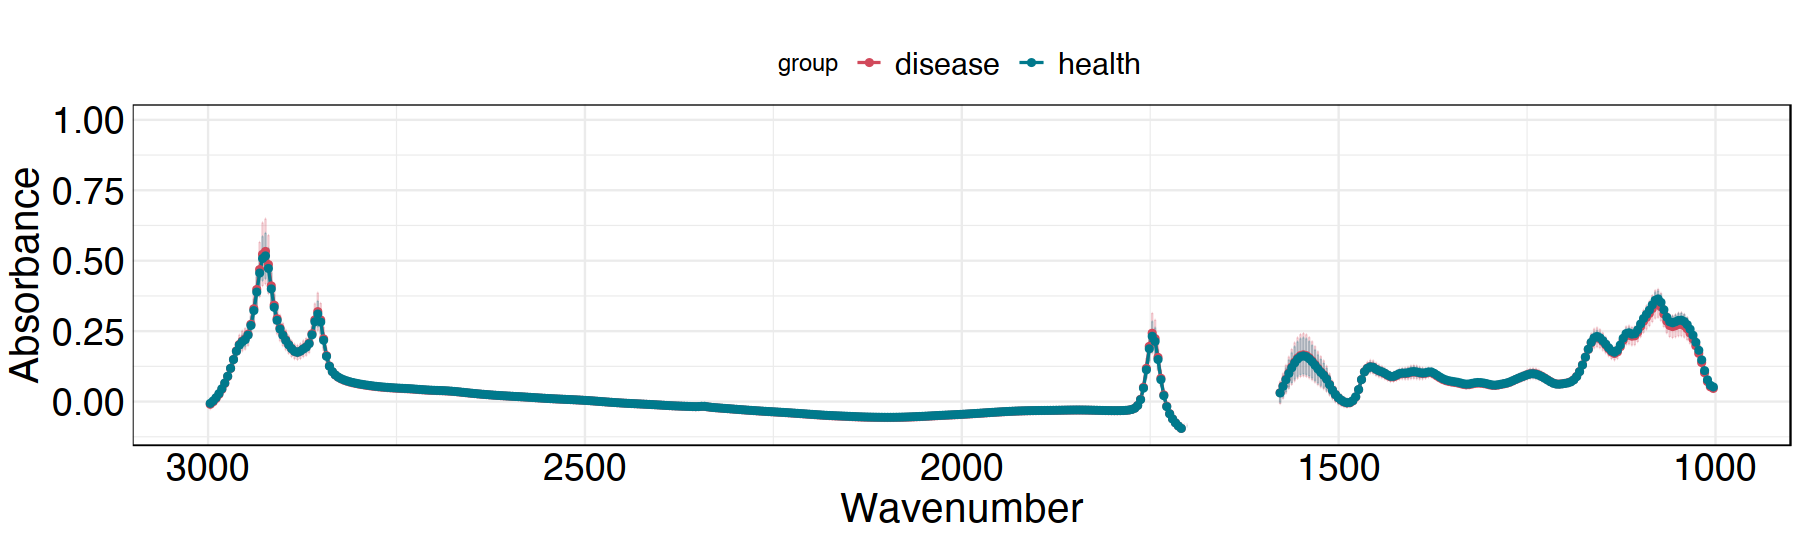

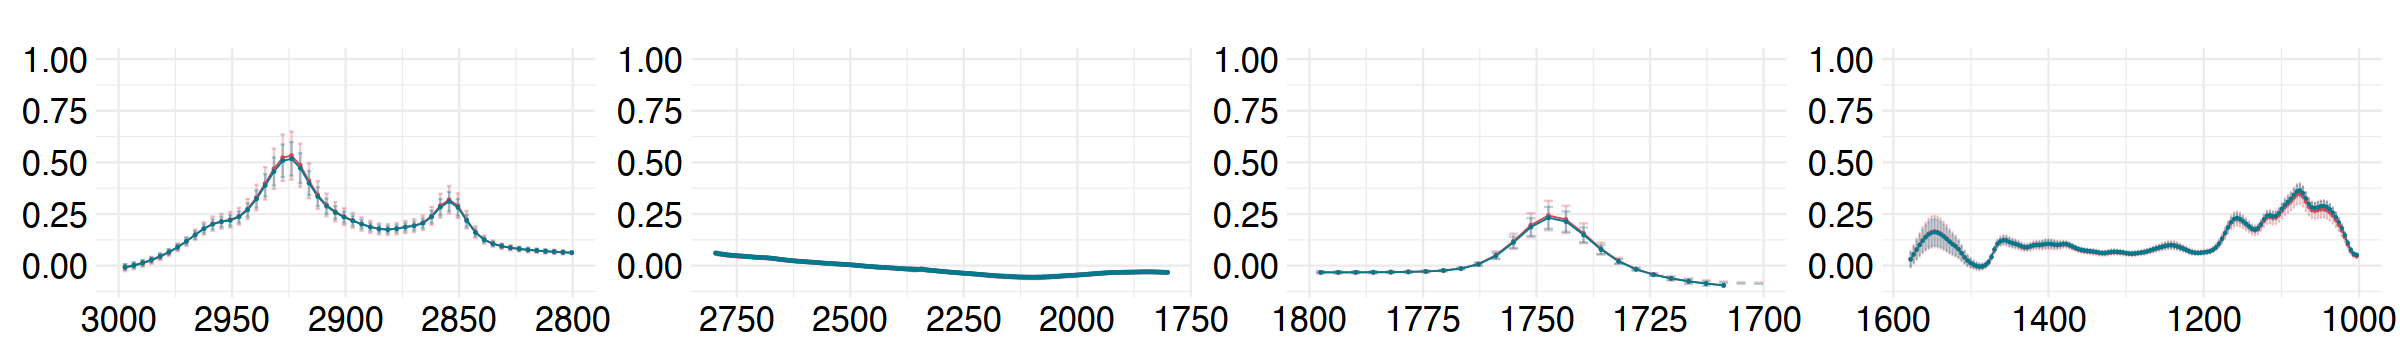

In [4]:
main_theme = theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 20, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 20), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank()) 

spc_s <- spc
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
spc_filtered$vial <- spc_s$vial
spc_filtered <- cbind(spc_filtered, spc_s[,937:953])
spc_filtered <- spc_filtered %>% filter(!vial %in% spc_filtered_id)

data_d <- spc_filtered %>% filter(disease == 1)
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)

data_h <- spc_filtered %>% filter(disease == 0) 
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)

se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
pd <- position_dodge(0.1) 
options(repr.plot.width=15, repr.plot.height=4.5)
ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=1, alpha = 0.3) +
    geom_line(position=pd, size = 0.7) +
    geom_point(position=pd, size=1.5) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(3000, 1000) +
    ylim(-0.1, 1) +
    theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 22, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 22), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "top", 
    axis.title.y = element_text(face = "bold", size = 24), 
    axis.title.x = element_text(face = "bold", size = 24, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank()) 

p1 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.3) +
    geom_point(position=pd, size=0.2) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(1585, 1000) +
    ylim(-0.1, 1) +
    main_theme

p2 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.4) +
    geom_point(position=pd, size=0.3) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(1800, 1700) +
    ylim(-0.1, 1) +
    main_theme

p3 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.4) +
    geom_point(position=pd, size=0.3) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 1) +
    main_theme

p4 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.4) +
    geom_point(position=pd, size=0.3) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(2800, 1800) +
    ylim(-0.1, 1) +
    main_theme

options(repr.plot.width=20, repr.plot.height=3)
p3 + p4 + p2 + p1 + plot_layout(nrow = 1)

Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), :
“NAs introduced by coercion”
Warning message in data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), :
“NAs introduced by coercion”
Scale for x is already present.
Adding another scale f

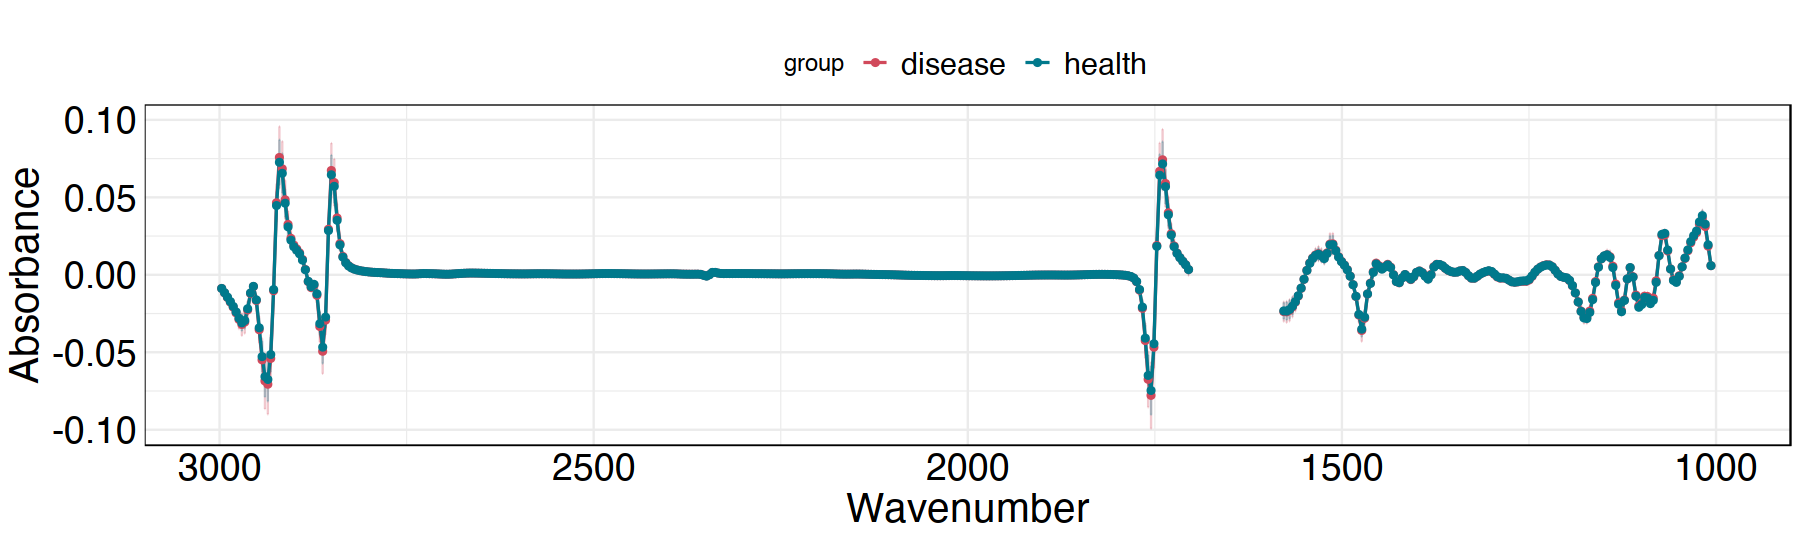

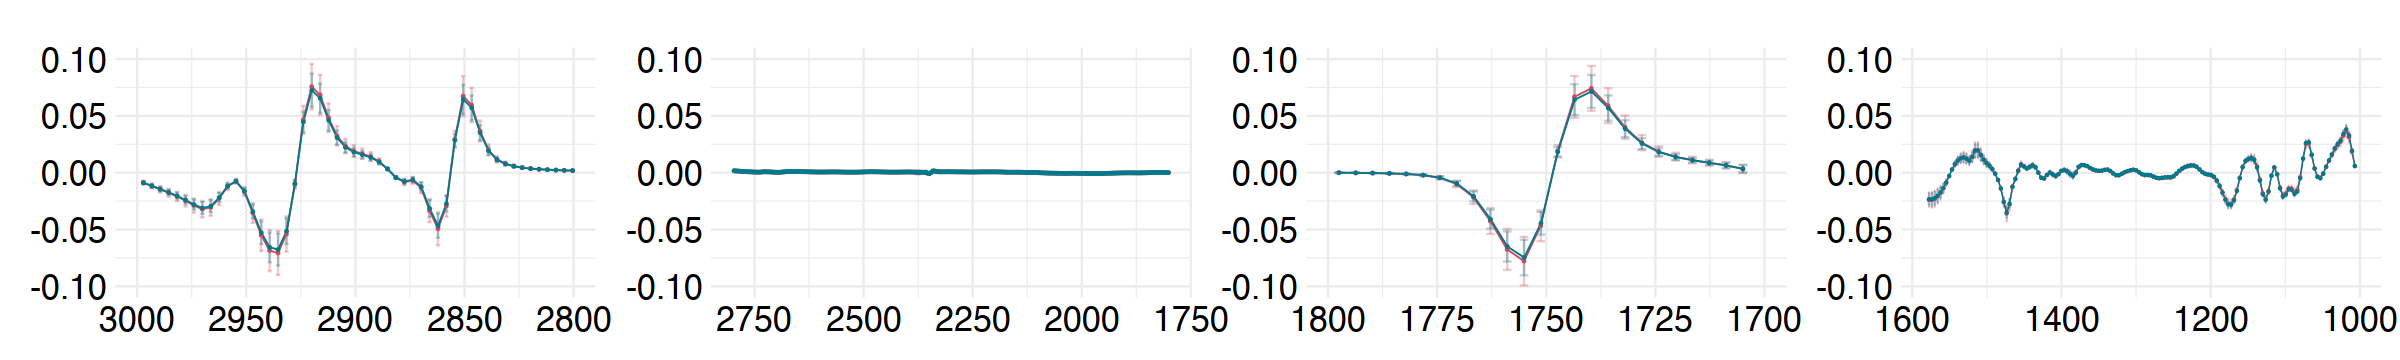

In [5]:
main_theme = theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 20, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 20), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank()) 

spc_s <- spc
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
wn <- colnames(spc_filtered)
spc_filtered <- t(apply(spc_filtered, 1, function(x) sgolayfilt(x, p = 1, n = 3, m = 1))) %>% as.data.frame()
colnames(spc_filtered) <- wn
spc_filtered$vial <- spc_s$vial
spc_filtered <- cbind(spc_filtered, spc_s[,937:953])
spc_filtered <- spc_filtered %>% filter(!vial %in% spc_filtered_id)

data_d <- spc_filtered %>% filter(disease == 1)
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)

data_h <- spc_filtered %>% filter(disease == 0) 
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)

se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
pd <- position_dodge(0.1) 
options(repr.plot.width=15, repr.plot.height=4.5)
ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=1, alpha = 0.3) +
    geom_line(position=pd, size = 0.7) +
    geom_point(position=pd, size=1.5) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(3000, 1000) +
    ylim(-0.1, 0.1) +
    theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 22, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 22), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "top", 
    axis.title.y = element_text(face = "bold", size = 24), 
    axis.title.x = element_text(face = "bold", size = 24, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.5),
    legend.key=element_blank()) 

p1 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.3) +
    geom_point(position=pd, size=0.2) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(1585, 1000) +
    ylim(-0.1, 0.1) +
    main_theme

p2 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.4) +
    geom_point(position=pd, size=0.3) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(1800, 1700) +
    ylim(-0.1, 0.1) +
    main_theme 

p3 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.4) +
    geom_point(position=pd, size=0.3) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.1) +
    main_theme

p4 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.4) +
    geom_point(position=pd, size=0.3) +
    scale_color_manual(values=c('#d1495b', '#00798c')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    xlim(2800, 1800) +
    ylim(-0.1, 0.1) +
    main_theme

options(repr.plot.width=20, repr.plot.height=3)
p3 + p4 + p2 + p1 + plot_layout(nrow = 1)

#### Figure 3

Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message in data.frame(spc = c(as.numeric(colnames(data_d)), 

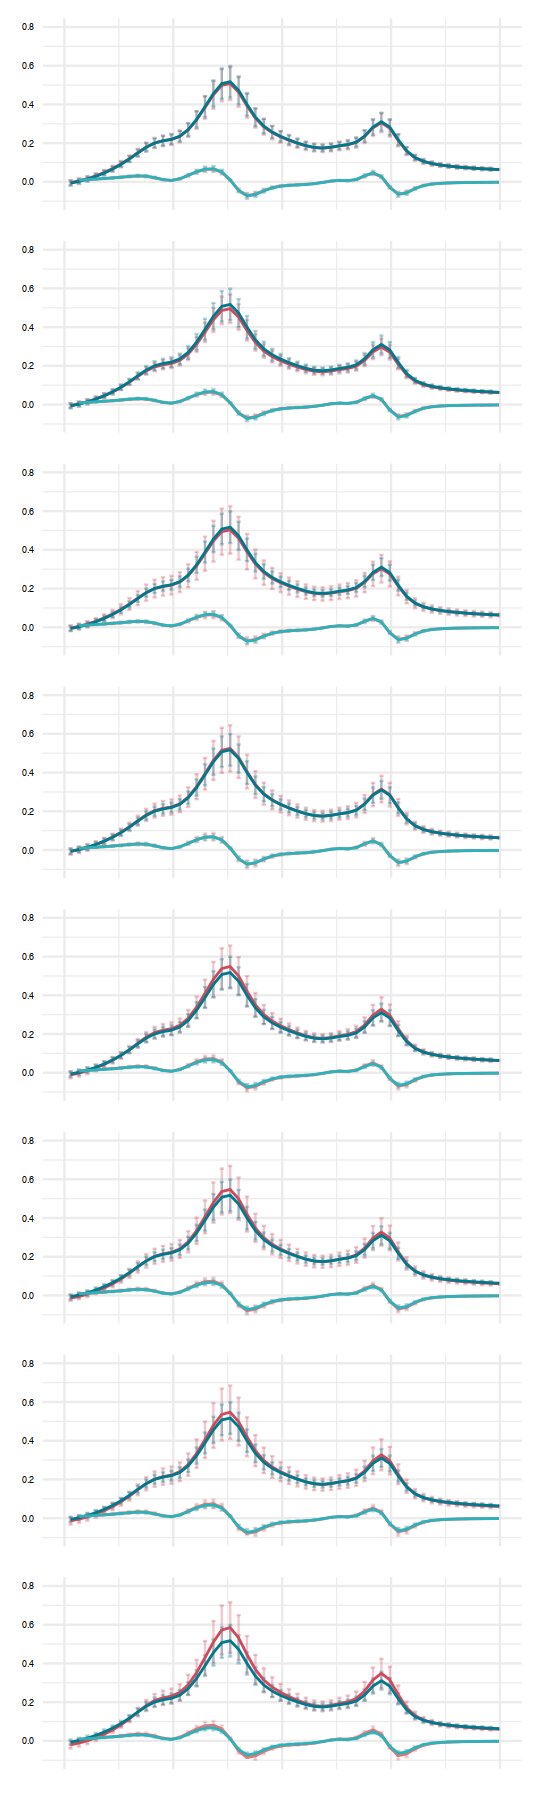

In [8]:
main_theme = theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 5, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank()) 

spc_s <- spc
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
spc_filtered$vial <- spc_s$vial
spc_filtered <- cbind(spc_filtered, spc_s[,937:953])
spc_filtered <- spc_filtered %>% filter(!vial %in% spc_filtered_id)
spc_s <- spc
spc_filtered_de <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered_de <- spc_filtered_de[, which(as.numeric(colnames(spc_filtered_de)) < 1580 | as.numeric(colnames(spc_filtered_de)) > 1700)]
sorted_cols <- sort(as.numeric(colnames(spc_filtered_de)), decreasing = TRUE)
spc_filtered_de <- spc_filtered_de[, as.character(sorted_cols)]
wn <- colnames(spc_filtered_de)
spc_filtered_de <- t(apply(spc_filtered_de, 1, function(x) sgolayfilt(x, p = 1, n = 3, m = 1))) %>% as.data.frame()
colnames(spc_filtered_de) <- wn
spc_filtered_de$vial <- spc_s$vial
spc_filtered_de <- cbind(spc_filtered_de, spc_s[,937:953])
spc_filtered_de <- spc_filtered_de %>% filter(!vial %in% spc_filtered_id)

pd <- position_dodge(0.1) 
                           
data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in > 14)
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in > 14)
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p1 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme
                        
data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in <= 14) %>% filter(disease_in >= 11) 
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in <= 14) %>% filter(disease_in >= 11) 
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p2 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme

data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in <= 10) %>% filter(disease_in >= 8) 
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in <= 10) %>% filter(disease_in >= 8) 
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p3 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme

data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in <= 7) %>% filter(disease_in >= 6) 
data_d <- data_d[,c(1:487)]
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in <= 7) %>% filter(disease_in >= 6) 
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p4 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme

data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in <= 5) %>% filter(disease_in >= 4) 
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in <= 5) %>% filter(disease_in >= 4) 
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p5 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme

data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in == 3)
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in == 3)
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p6 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme

data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in == 2)
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in == 2)
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p7 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme

data_d <- spc_filtered %>% filter(disease == 1) %>% filter(disease_in == 1)
data_d <- data_d[,c(1:487)]
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease', length(d_sd)), rep('health', length(h_sd))))
data_d <- spc_filtered_de %>% filter(disease == 1) %>% filter(disease_in == 1)
data_d <- data_d[,c(1:487)] 
d_mean <- sapply(data_d, mean)
d_sd <- sapply(data_d, sd)
data_h <- spc_filtered_de %>% filter(disease == 0)
data_h <- data_h[,c(1:487)] 
h_mean <- sapply(data_h, mean)
h_sd <- sapply(data_h, sd)
se_de <- data.frame(spc = c(as.numeric(colnames(data_d)), as.numeric(colnames(data_h))), mean = c(d_mean, h_mean), sd = c(d_sd, h_sd), group = c(rep('disease_de', length(d_sd)), rep('health_de', length(h_sd))))
se <- rbind(se, se_de)
p8 <- ggplot(se, aes(x=spc, y=mean, color=group)) + 
    geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=2, alpha = 0.3) +
    geom_line(position=pd, size = 0.6) +
    scale_color_manual(values=c('#d1495b', '#E37478', '#00798c', '#2EB2BA')) + 
    scale_x_reverse() +
    xlim(3000, 2800) +
    ylim(-0.1, 0.8) +
    main_theme

options(repr.plot.width=4.5, repr.plot.height=15)
p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8 + plot_layout(nrow = 8)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FU

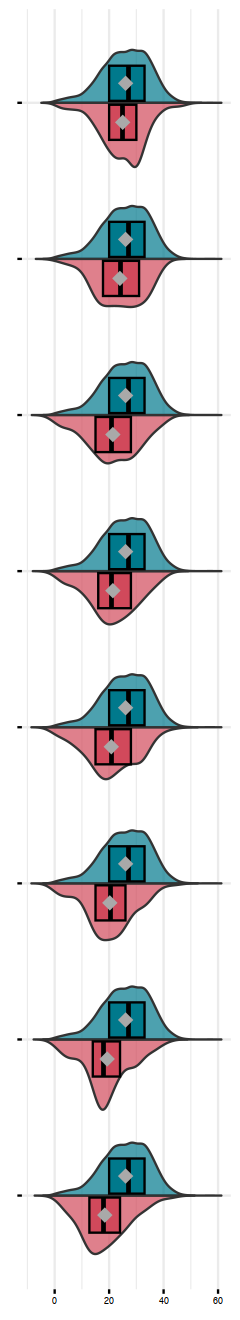

In [12]:
data <- read.csv('./JM006_0603.csv', sep = ",", header = T, row.names = NULL)
data$dim_met[data$dim_met > 30] <- NA
data$dim_da[data$dim_da > 30] <- NA
data$dim_ket[data$dim_ket > 30] <- NA
data$dim_mast[data$dim_mast > 30] <- NA
data$disease_min <- apply(data[, 45:48], 1, min, na.rm = TRUE)
data$disease <- ifelse(is.finite(data$disease_min), 1, 0)
data_d <- data %>% filter(disease == 1) %>% filter(dim <= 15) %>% filter(dim < disease_min) 
data_h <- data %>% filter(disease == 0) %>% filter(dim <= 15) 
data <- rbind(data_d, data_h)
data$met_in <- data$dim_met - data$dim
data$da_in <- data$dim_da - data$dim
data$ket_in <- data$dim_ket - data$dim
data$mast_in <- data$dim_mast - data$dim
data$disease_in <- apply(data[, c('met_in', 'da_in', 'ket_in', 'mast_in')], 1, min, na.rm = TRUE)
data <- subset(data, select = c(cow_id, vial, milkweightlbs, parity, cells, conductivity, dim, dim_met, dim_da, dim_ket, dim_mast, met_in, da_in, ket_in, mast_in, disease_in, disease_min, disease))

data_h <- data %>% filter(disease == 0) 
data_d14 <- data %>% filter(disease == 1) %>% filter(disease_in > 14) 
data_d11 <- data %>% filter(disease == 1) %>% filter(disease_in <= 14) %>% filter(disease_in >= 11)
data_d8 <- data %>% filter(disease == 1) %>% filter(disease_in <= 10) %>% filter(disease_in >= 8) 
data_d6 <- data %>% filter(disease == 1) %>% filter(disease_in <= 7) %>% filter(disease_in >= 6) 
data_d4 <- data %>% filter(disease == 1) %>% filter(disease_in <= 5) %>% filter(disease_in >= 4) 
data_d3 <- data %>% filter(disease == 1) %>% filter(disease_in == 3) 
data_d2 <- data %>% filter(disease == 1) %>% filter(disease_in == 2) 
data_d1 <- data %>% filter(disease == 1) %>% filter(disease_in == 1) 

data_dh <- data.frame(milkweight = c(data_d14$milkweightlbs, data_h$milkweightlbs, data_d11$milkweightlbs, data_h$milkweightlbs, data_d8$milkweightlbs, data_h$milkweightlbs, data_d6$milkweightlbs, data_h$milkweightlbs, data_d4$milkweightlbs, data_h$milkweightlbs, data_d3$milkweightlbs, data_h$milkweightlbs, data_d2$milkweightlbs, data_h$milkweightlbs, data_d1$milkweightlbs, data_h$milkweightlbs),
           day = c(rep('>-14 Days', length(c(data_d14$milkweightlbs, data_h$milkweightlbs))), rep('-14 - -11 Days', length(c(data_d11$milkweightlbs, data_h$milkweightlbs))), rep('-10 - -8 Days', length(c(data_d8$milkweightlbs, data_h$milkweightlbs))), rep('-7 - -6 Days', length(c(data_d6$milkweightlbs, data_h$milkweightlbs))), rep('-5 - -4 Days', length(c(data_d4$milkweightlbs, data_h$milkweightlbs))), rep('-3 Days', length(c(data_d3$milkweightlbs, data_h$milkweightlbs))), rep('-2 Days', length(c(data_d2$milkweightlbs, data_h$milkweightlbs))), rep('-1 Days', length(c(data_d1$milkweightlbs, data_h$milkweightlbs)))),
           group = c(rep('disease', length(data_d14$milkweightlbs)), rep('health', length(data_h$milkweightlbs)), rep('disease', length(data_d11$milkweightlbs)), rep('health', length(data_h$milkweightlbs)), rep('disease', length(data_d8$milkweightlbs)), rep('health', length(data_h$milkweightlbs)), rep('disease', length(data_d6$milkweightlbs)), rep('health', length(data_h$milkweightlbs)), rep('disease', length(data_d4$milkweightlbs)), rep('health', length(data_h$milkweightlbs)), rep('disease', length(data_d3$milkweightlbs)), rep('health', length(data_h$milkweightlbs)), rep('disease', length(data_d2$milkweightlbs)), rep('health', length(data_h$milkweightlbs)), rep('disease', length(data_d1$milkweightlbs)), rep('health', length(data_h$milkweightlbs)))
                  )
data_dh$day <- factor(data_dh$day, levels=c("-1 Days", "-2 Days", "-3 Days", "-5 - -4 Days", "-7 - -6 Days", "-10 - -8 Days", "-14 - -11 Days", ">-14 Days"))
data_dh$group <- factor(data_dh$group, levels=c("disease", "health"))
options(repr.plot.width=2, repr.plot.height=11)
ggplot(data_dh, aes(day, milkweight, fill=group)) + 
  geom_split_violin(alpha = .7, trim = FALSE) + 
  geom_boxplot(color = 'black', width = 0.5, notch = FALSE, notchwidth = .4, outlier.shape = NA, coef=0) +
  stat_summary(fun.y = mean, color = "darkgrey", position = position_dodge(0.5), geom = "point", shape = 18, size = 4, show.legend = FALSE) +
  scale_fill_manual(values=c('#d1495b', '#00798c')) + 
  theme_minimal() +
  theme(legend.position = "none",
        plot.title = element_text(size = 22),
        axis.title.x = element_text(size = 0, color = "black", hjust = 0.5),
        axis.title.y = element_text(size = 0,color = "black", hjust = 0.5),
        axis.ticks = element_line(color = "black"), 
        axis.text.y = element_text(color = "black", size = 0),
        axis.text.x = element_text(color = "black", size = 5)) +
    coord_flip()

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FU

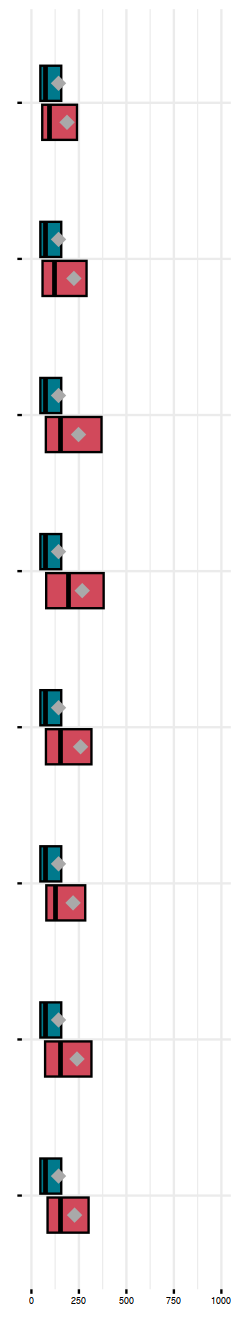

In [11]:
data <- read.csv('./JM006_0603.csv', sep = ",", header = T, row.names = NULL)
data$dim_met[data$dim_met > 30] <- NA
data$dim_da[data$dim_da > 30] <- NA
data$dim_ket[data$dim_ket > 30] <- NA
data$dim_mast[data$dim_mast > 30] <- NA
data$disease_min <- apply(data[, 45:48], 1, min, na.rm = TRUE)
data$disease <- ifelse(is.finite(data$disease_min), 1, 0)
data_d <- data %>% filter(disease == 1) %>% filter(dim <= 15) %>% filter(dim < disease_min) 
data_h <- data %>% filter(disease == 0) %>% filter(dim <= 15) 
data <- rbind(data_d, data_h)
data$met_in <- data$dim_met - data$dim
data$da_in <- data$dim_da - data$dim
data$ket_in <- data$dim_ket - data$dim
data$mast_in <- data$dim_mast - data$dim
data$disease_in <- apply(data[, c('met_in', 'da_in', 'ket_in', 'mast_in')], 1, min, na.rm = TRUE)
data <- subset(data, select = c(cow_id, vial, milkweightlbs, parity, cells, conductivity, dim, dim_met, dim_da, dim_ket, dim_mast, met_in, da_in, ket_in, mast_in, disease_in, disease_min, disease))

data_h <- data %>% filter(disease == 0) 
data_d14 <- data %>% filter(disease == 1) %>% filter(disease_in > 14) 
data_d11 <- data %>% filter(disease == 1) %>% filter(disease_in <= 14) %>% filter(disease_in >= 11)
data_d8 <- data %>% filter(disease == 1) %>% filter(disease_in <= 10) %>% filter(disease_in >= 8) 
data_d6 <- data %>% filter(disease == 1) %>% filter(disease_in <= 7) %>% filter(disease_in >= 6) 
data_d4 <- data %>% filter(disease == 1) %>% filter(disease_in <= 5) %>% filter(disease_in >= 4) 
data_d3 <- data %>% filter(disease == 1) %>% filter(disease_in == 3) 
data_d2 <- data %>% filter(disease == 1) %>% filter(disease_in == 2) 
data_d1 <- data %>% filter(disease == 1) %>% filter(disease_in == 1) 

data_dh <- data.frame(milkweight = c(data_d14$cells, data_h$cells, data_d11$cells, data_h$cells, data_d8$cells, data_h$cells, data_d6$cells, data_h$cells, data_d4$cells, data_h$cells, data_d3$cells, data_h$cells, data_d2$cells, data_h$cells, data_d1$cells, data_h$cells),
           day = c(rep('>-14 Days', length(c(data_d14$cells, data_h$cells))), rep('-14 - -11 Days', length(c(data_d11$cells, data_h$cells))), rep('-10 - -8 Days', length(c(data_d8$cells, data_h$cells))), rep('-7 - -6 Days', length(c(data_d6$cells, data_h$cells))), rep('-5 - -4 Days', length(c(data_d4$cells, data_h$cells))), rep('-3 Days', length(c(data_d3$cells, data_h$cells))), rep('-2 Days', length(c(data_d2$cells, data_h$cells))), rep('-1 Days', length(c(data_d1$cells, data_h$cells)))),
           group = c(rep('disease', length(data_d14$cells)), rep('health', length(data_h$cells)), rep('disease', length(data_d11$cells)), rep('health', length(data_h$cells)), rep('disease', length(data_d8$cells)), rep('health', length(data_h$cells)), rep('disease', length(data_d6$cells)), rep('health', length(data_h$cells)), rep('disease', length(data_d4$cells)), rep('health', length(data_h$cells)), rep('disease', length(data_d3$cells)), rep('health', length(data_h$cells)), rep('disease', length(data_d2$cells)), rep('health', length(data_h$cells)), rep('disease', length(data_d1$cells)), rep('health', length(data_h$cells)))
                  )
data_dh$day <- factor(data_dh$day, levels=c("-1 Days", "-2 Days", "-3 Days", "-5 - -4 Days", "-7 - -6 Days", "-10 - -8 Days", "-14 - -11 Days", ">-14 Days"))
data_dh$group <- factor(data_dh$group, levels=c("disease", "health"))
options(repr.plot.width=2, repr.plot.height=11)
ggplot(data_dh, aes(day, milkweight, fill=group)) + 
  geom_boxplot(color = 'black', width = 0.5, notch = FALSE, notchwidth = .4, outlier.shape = NA, coef=0) +
  stat_summary(fun.y = mean, color = "darkgrey", position = position_dodge(0.5), geom = "point", shape = 18, size = 4, show.legend = FALSE) +
  scale_fill_manual(values=c('#d1495b', '#00798c')) + 
  ylim(0, 1000) +
  theme_minimal() +
  theme(legend.position = "none",
        plot.title = element_text(size = 22),
        axis.title.x = element_text(size = 0, color = "black", hjust = 0.5),
        axis.title.y = element_text(size = 0,color = "black", hjust = 0.5),
        axis.ticks = element_line(color = "black"), 
        axis.text.y = element_text(color = "black", size = 0),
        axis.text.x = element_text(color = "black", size = 5)) +
    coord_flip()

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FU

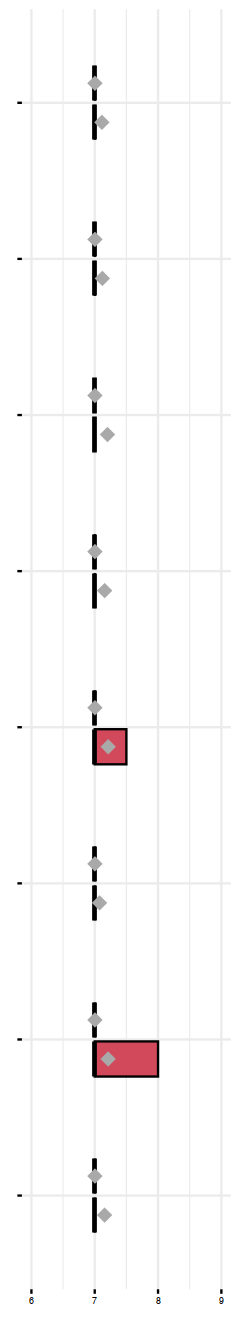

In [10]:
data <- read.csv('./JM006_0603.csv', sep = ",", header = T, row.names = NULL)
data$dim_met[data$dim_met > 30] <- NA
data$dim_da[data$dim_da > 30] <- NA
data$dim_ket[data$dim_ket > 30] <- NA
data$dim_mast[data$dim_mast > 30] <- NA
data$disease_min <- apply(data[, 45:48], 1, min, na.rm = TRUE)
data$disease <- ifelse(is.finite(data$disease_min), 1, 0)
data_d <- data %>% filter(disease == 1) %>% filter(dim <= 15) %>% filter(dim < disease_min) 
data_h <- data %>% filter(disease == 0) %>% filter(dim <= 15) 
data <- rbind(data_d, data_h)
data$met_in <- data$dim_met - data$dim
data$da_in <- data$dim_da - data$dim
data$ket_in <- data$dim_ket - data$dim
data$mast_in <- data$dim_mast - data$dim
data$disease_in <- apply(data[, c('met_in', 'da_in', 'ket_in', 'mast_in')], 1, min, na.rm = TRUE)
data <- subset(data, select = c(cow_id, vial, milkweightlbs, parity, conductivity, conductivity, dim, dim_met, dim_da, dim_ket, dim_mast, met_in, da_in, ket_in, mast_in, disease_in, disease_min, disease))

data_h <- data %>% filter(disease == 0) 
data_d14 <- data %>% filter(disease == 1) %>% filter(disease_in > 14) 
data_d11 <- data %>% filter(disease == 1) %>% filter(disease_in <= 14) %>% filter(disease_in >= 11)
data_d8 <- data %>% filter(disease == 1) %>% filter(disease_in <= 10) %>% filter(disease_in >= 8) 
data_d6 <- data %>% filter(disease == 1) %>% filter(disease_in <= 7) %>% filter(disease_in >= 6) 
data_d4 <- data %>% filter(disease == 1) %>% filter(disease_in <= 5) %>% filter(disease_in >= 4) 
data_d3 <- data %>% filter(disease == 1) %>% filter(disease_in == 3) 
data_d2 <- data %>% filter(disease == 1) %>% filter(disease_in == 2) 
data_d1 <- data %>% filter(disease == 1) %>% filter(disease_in == 1) 

data_dh <- data.frame(conductivity = c(data_d14$conductivity, data_h$conductivity, data_d11$conductivity, data_h$conductivity, data_d8$conductivity, data_h$conductivity, data_d6$conductivity, data_h$conductivity, data_d4$conductivity, data_h$conductivity, data_d3$conductivity, data_h$conductivity, data_d2$conductivity, data_h$conductivity, data_d1$conductivity, data_h$conductivity),
           day = c(rep('>-14 Days', length(c(data_d14$conductivity, data_h$conductivity))), rep('-14 - -11 Days', length(c(data_d11$conductivity, data_h$conductivity))), rep('-10 - -8 Days', length(c(data_d8$conductivity, data_h$conductivity))), rep('-7 - -6 Days', length(c(data_d6$conductivity, data_h$conductivity))), rep('-5 - -4 Days', length(c(data_d4$conductivity, data_h$conductivity))), rep('-3 Days', length(c(data_d3$conductivity, data_h$conductivity))), rep('-2 Days', length(c(data_d2$conductivity, data_h$conductivity))), rep('-1 Days', length(c(data_d1$conductivity, data_h$conductivity)))),
           group = c(rep('disease', length(data_d14$conductivity)), rep('health', length(data_h$conductivity)), rep('disease', length(data_d11$conductivity)), rep('health', length(data_h$conductivity)), rep('disease', length(data_d8$conductivity)), rep('health', length(data_h$conductivity)), rep('disease', length(data_d6$conductivity)), rep('health', length(data_h$conductivity)), rep('disease', length(data_d4$conductivity)), rep('health', length(data_h$conductivity)), rep('disease', length(data_d3$conductivity)), rep('health', length(data_h$conductivity)), rep('disease', length(data_d2$conductivity)), rep('health', length(data_h$conductivity)), rep('disease', length(data_d1$conductivity)), rep('health', length(data_h$conductivity)))
                  )
data_dh$day <- factor(data_dh$day, levels=c("-1 Days", "-2 Days", "-3 Days", "-5 - -4 Days", "-7 - -6 Days", "-10 - -8 Days", "-14 - -11 Days", ">-14 Days"))
data_dh$group <- factor(data_dh$group, levels=c("disease", "health"))
options(repr.plot.width=2, repr.plot.height=11)
ggplot(data_dh, aes(day, conductivity, fill=group)) + 
  geom_boxplot(color = 'black', width = 0.5, notch = FALSE, notchwidth = .4, outlier.shape = NA, coef=0) +
  stat_summary(fun.y = mean, color = "darkgrey", position = position_dodge(0.5), geom = "point", shape = 18, size = 4, show.legend = FALSE) +
  scale_fill_manual(values=c('#d1495b', '#00798c')) + 
  ylim(6, 9) +
  theme_minimal() +
  theme(legend.position = "none",
        plot.title = element_text(size = 22),
        axis.title.x = element_text(size = 0, color = "black", hjust = 0.5),
        axis.title.y = element_text(size = 0,color = "black", hjust = 0.5),
        axis.ticks = element_line(color = "black"), 
        axis.text.y = element_text(color = "black", size = 0),
        axis.text.x = element_text(color = "black", size = 5)) +
    coord_flip()

#### Figure 4A

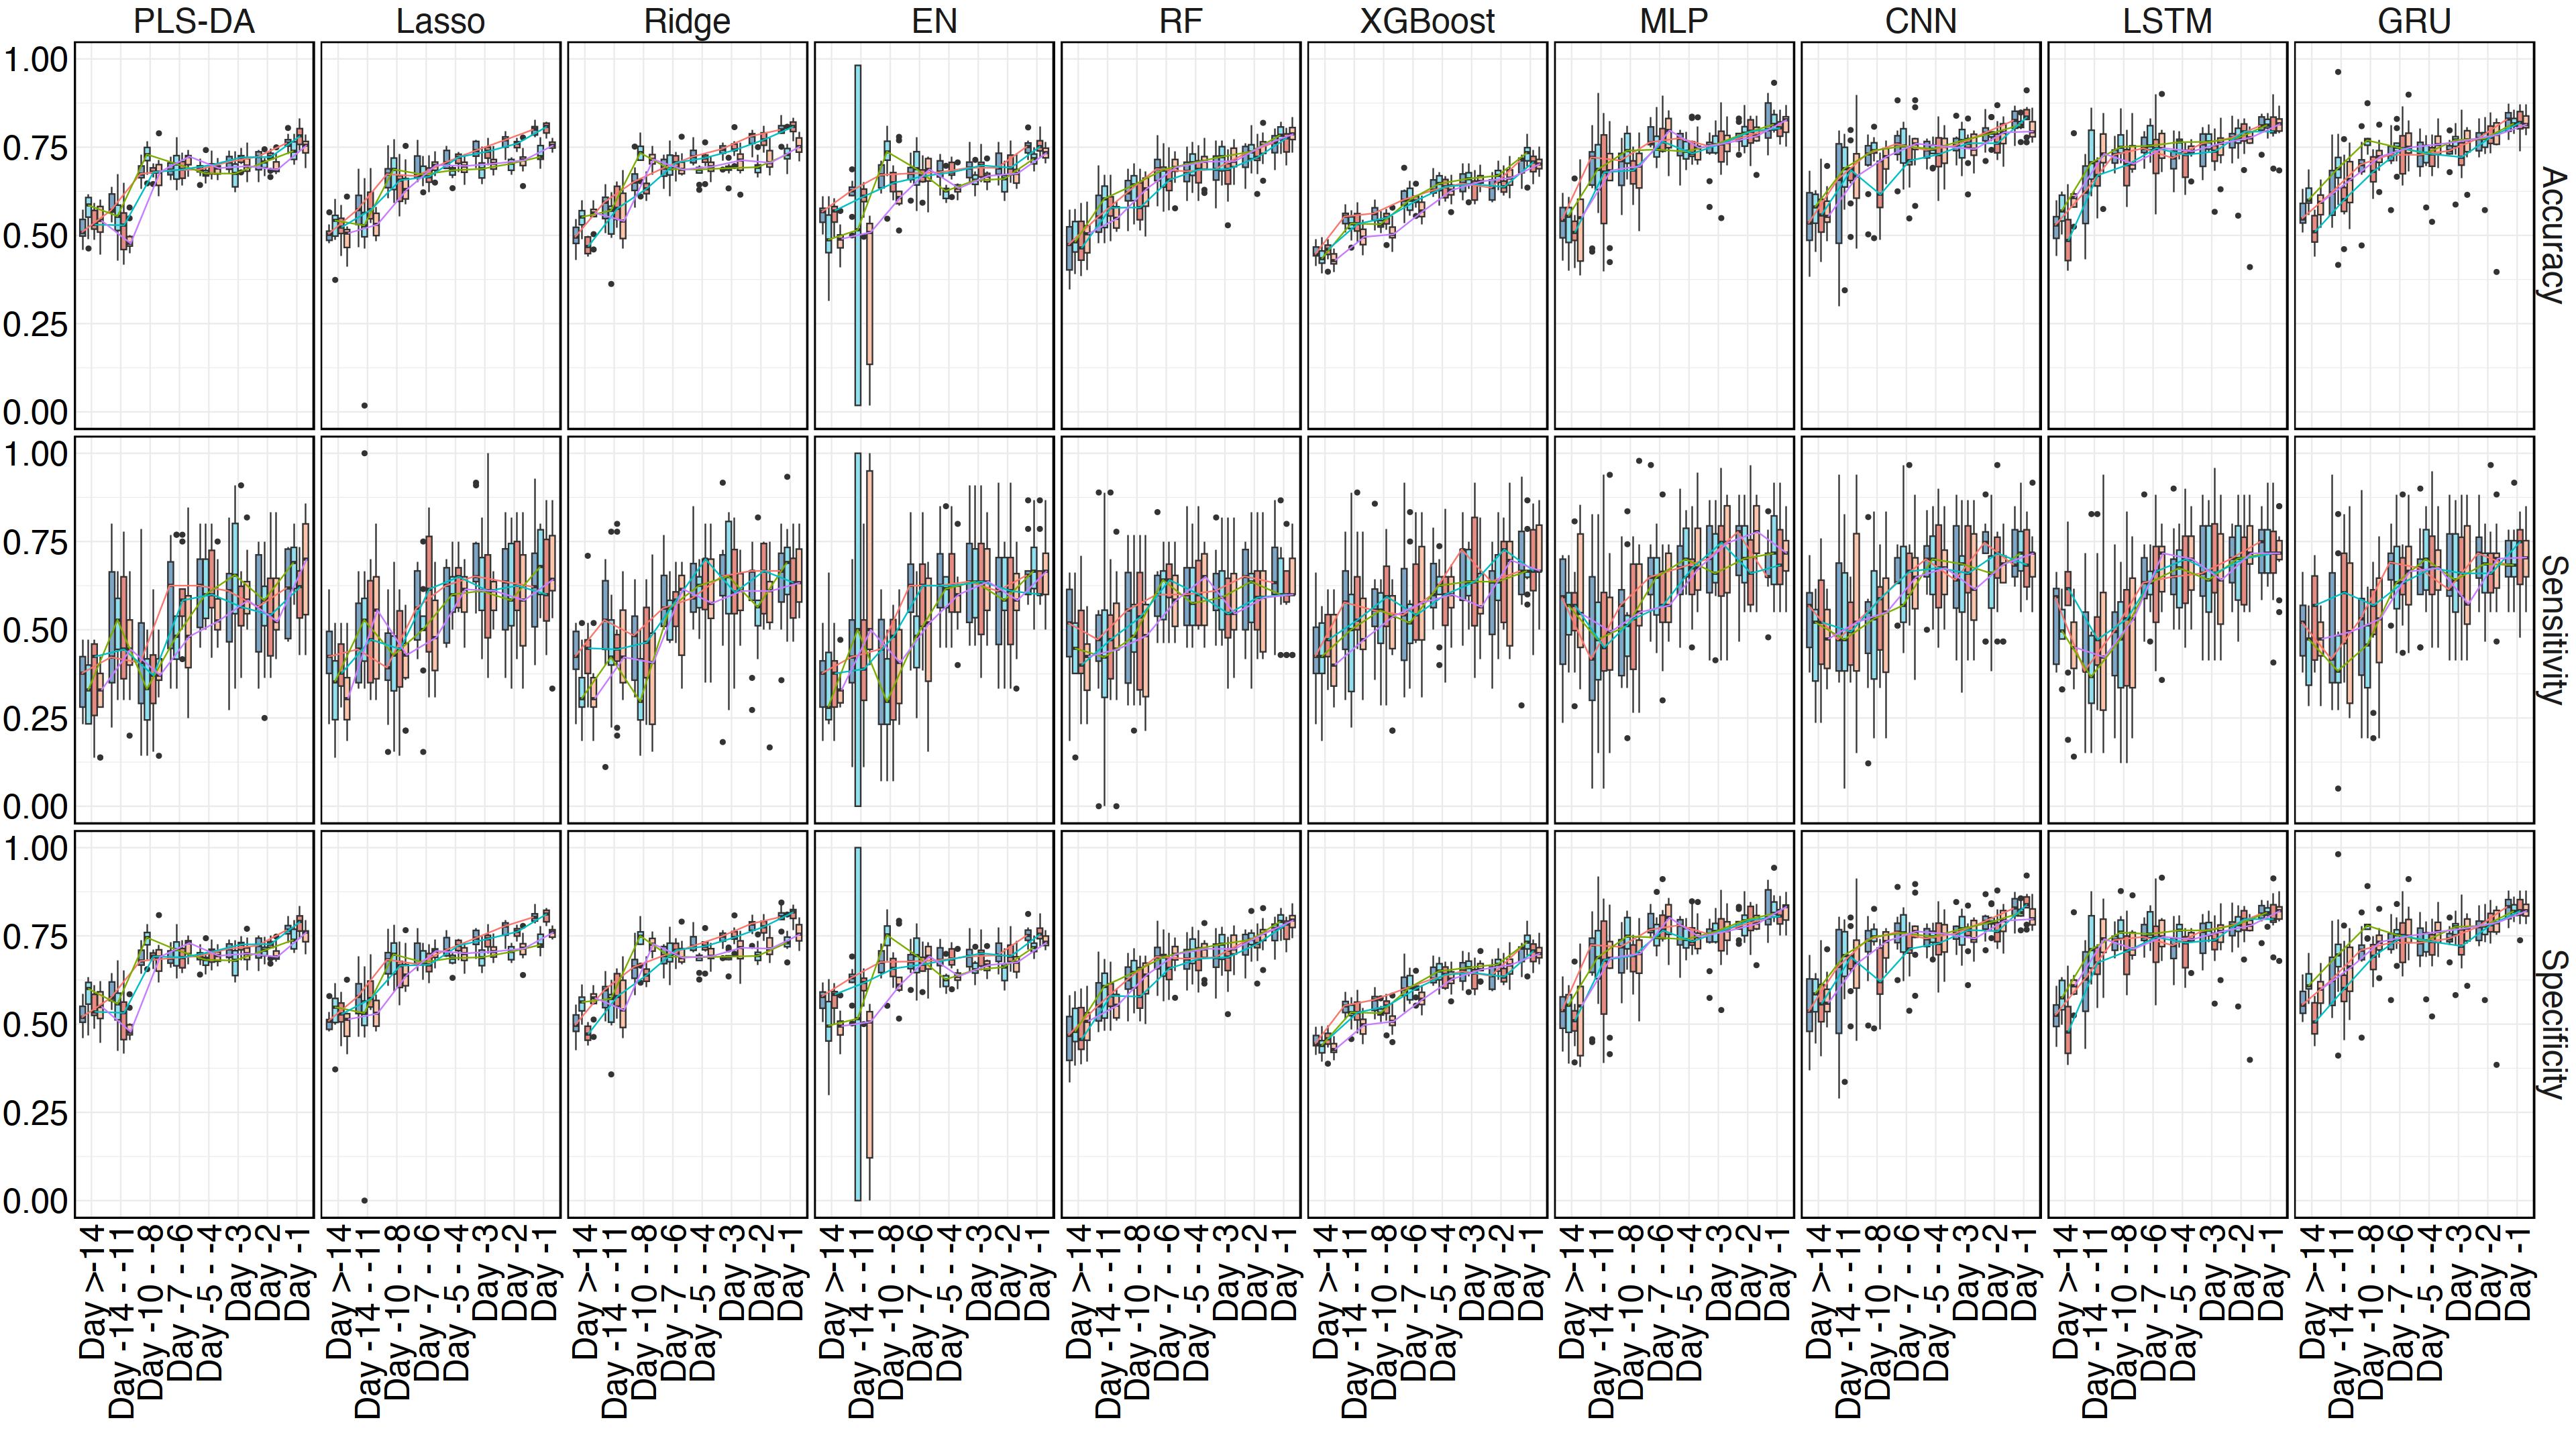

In [13]:
main_theme = theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=30),
    axis.text.y = element_text(colour = "black", size = 30, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 30, angle = 90, vjust = 0.5, hjust = 1), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 1.2),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

data <- read.csv('./results1_1031.csv', sep = ",", header = T, row.names = NULL)
data <- gather(data, key = "metrics", value ="value", -model, -para, -day)

options(repr.plot.width=32, repr.plot.height=18)
data$model <- factor(data$model, levels=c('PLS-DA', 'Lasso', 'Ridge', 'EN', 'RF', 'XGBoost', 'MLP', 'CNN', 'LSTM', 'GRU'))
data$day <- factor(data$day, levels=c("Day >-14", "Day -14 - -11", "Day -10 - -8", "Day -7 - -6", "Day -5 - -4", "Day -3", "Day -2", "Day -1"))
data$para <- factor(data$para, levels=c('partial_spc', 'partial_1d', 'whole_spc', 'whole_1d'))
ggplot(data, aes(x=day, y=value, fill=para)) + 
  geom_boxplot(position=position_dodge(0.8)) +
  stat_summary(fun.y = median, geom = 'line', aes(group = para, color = para), position = position_dodge(width = 0.9)) +
  scale_x_discrete(labels = c("Day >-14", "Day -14 - -11", "Day -10 - -8", "Day -7 - -6", "Day -5 - -4", "Day -3", "Day -2", "Day -1")) +
  scale_fill_manual(values=c('#7DA6C6', '#90e0ef', '#E68B81', '#fbc4ab')) + 
  facet_grid(rows = vars(metrics), cols = vars(model)) +
  ylim(0, 1) +
  main_theme

#### Figure 4B

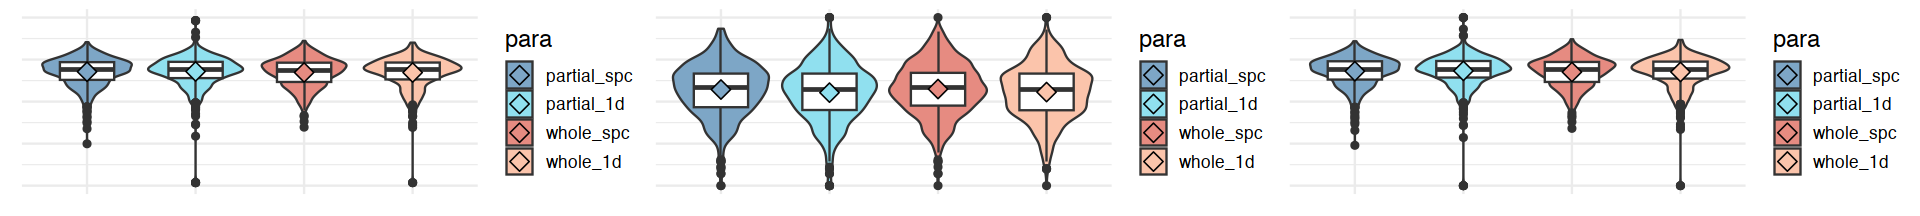

In [14]:
main_theme = theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=30),
    axis.text.y = element_text(colour = "black", size = 0, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle = 90, vjust = 0.5, hjust = 0.5), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "right", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

data <- read.csv('./results1_1031.csv', sep = ",", header = T, row.names = NULL)
data <- gather(data, key = "metrics", value ="value", -model, -para, -day)

data_a <- data %>% filter(metrics == 'Accuracy')
data_a$para <- factor(data_a$para, levels=c('partial_spc', 'partial_1d', 'whole_spc', 'whole_1d'))
p1 <- ggplot(data_a, aes(x=para, y=value, fill=para)) + 
scale_fill_manual(values=c('#7DA6C6', '#90e0ef', '#E68B81', '#fbc4ab')) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  main_theme

data_s <- data %>% filter(metrics == 'Sensitivity')
data_s$para <- factor(data_s$para, levels=c('partial_spc', 'partial_1d', 'whole_spc', 'whole_1d'))
p2 <- ggplot(data_s, aes(x=para, y=value, fill=para)) + 
scale_fill_manual(values=c('#7DA6C6', '#90e0ef', '#E68B81', '#fbc4ab')) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  main_theme

data_s <- data %>% filter(metrics == 'Specificity')
data_s$para <- factor(data_s$para, levels=c('partial_spc', 'partial_1d', 'whole_spc', 'whole_1d'))
p3 <- ggplot(data_s, aes(x=para, y=value, fill=para)) + 
scale_fill_manual(values=c('#7DA6C6', '#90e0ef', '#E68B81', '#fbc4ab')) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  main_theme

options(repr.plot.width=16, repr.plot.height=1.8)
p1 + p2 + p3 + plot_layout(nrow = 1)

#### Figure 4C

`summarise()` has grouped output by 'model'. You can override using the `.groups` argument.


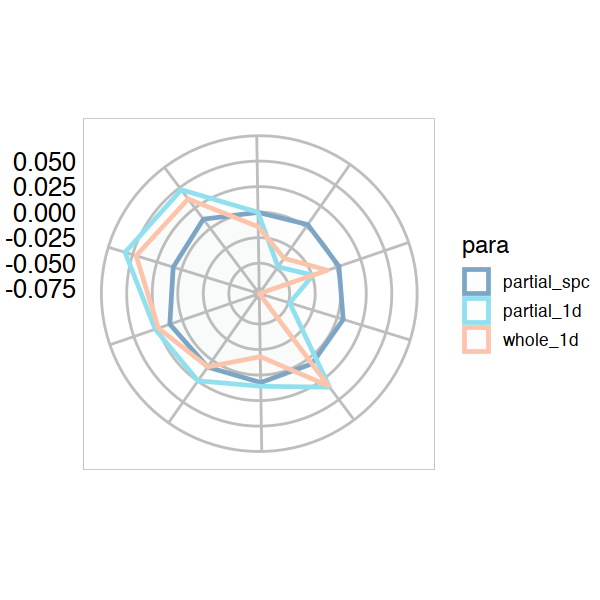

In [18]:
main_theme = theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=15),
    axis.text.y = element_text(colour = "black", size = 15, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle = 0, vjust = 0.5, hjust = 1), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "right", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.grid.major = element_line(colour = "grey", size = 0.6),
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.05),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

data <- read.csv('./results1_1031.csv', sep = ",", header = T, row.names = NULL)
data <- subset(data, select = c(Accuracy, model, para))
colnames(data) <- c('value', 'model', 'para')
data <- data %>% group_by(model, para) %>% 
  summarise(mean=mean(value))

data_plsda <- data %>% filter(model == 'PLS-DA')
data_plsda$mean = (data_plsda$mean - data_plsda[data_plsda$para == 'whole_spc', 'mean', drop = TRUE])/data_plsda[data_plsda$para == 'whole_spc', 'mean', drop = TRUE] 
data_plsda <- data_plsda %>% filter(para != 'whole_spc')
data_plsda <- subset(data_plsda, select = c(para, mean))
colnames(data_plsda) <- c('para', 'value')
data_plsda$group <- 'PLS-DA'

data_lasso <- data %>% filter(model == 'Lasso')
data_lasso$mean = (data_lasso$mean - data_lasso[data_lasso$para == 'whole_spc', 'mean', drop = TRUE])/data_lasso[data_lasso$para == 'whole_spc', 'mean', drop = TRUE] 
data_lasso <- data_lasso %>% filter(para != 'whole_spc')
data_lasso <- subset(data_lasso, select = c(para, mean))
colnames(data_lasso) <- c('para', 'value')
data_lasso$group <- 'Lasso'

data_ridge <- data %>% filter(model == 'Ridge')
data_ridge$mean = (data_ridge$mean - data_ridge[data_ridge$para == 'whole_spc', 'mean', drop = TRUE])/data_ridge[data_ridge$para == 'whole_spc', 'mean', drop = TRUE] 
data_ridge <- data_ridge %>% filter(para != 'whole_spc')
data_ridge <- subset(data_ridge, select = c(para, mean))
colnames(data_ridge) <- c('para', 'value')
data_ridge$group <- 'Ridge'

data_en <- data %>% filter(model == 'EN')
data_en$mean = (data_en$mean - data_en[data_en$para == 'whole_spc', 'mean', drop = TRUE])/data_en[data_en$para == 'whole_spc', 'mean', drop = TRUE] 
data_en <- data_en %>% filter(para != 'whole_spc')
data_en <- subset(data_en, select = c(para, mean))
colnames(data_en) <- c('para', 'value')
data_en$group <- 'EN'

data_rf <- data %>% filter(model == 'RF')
data_rf$mean = (data_rf$mean - data_rf[data_rf$para == 'whole_spc', 'mean', drop = TRUE])/data_rf[data_rf$para == 'whole_spc', 'mean', drop = TRUE] 
data_rf <- data_rf %>% filter(para != 'whole_spc')
data_rf <- subset(data_rf, select = c(para, mean))
colnames(data_rf) <- c('para', 'value')
data_rf$group <- 'RF'

data_xgboost <- data %>% filter(model == 'XGBoost')
data_xgboost$mean = (data_xgboost$mean - data_xgboost[data_xgboost$para == 'whole_spc', 'mean', drop = TRUE])/data_xgboost[data_xgboost$para == 'whole_spc', 'mean', drop = TRUE] 
data_xgboost <- data_xgboost %>% filter(para != 'whole_spc')
data_xgboost <- subset(data_xgboost, select = c(para, mean))
colnames(data_xgboost) <- c('para', 'value')
data_xgboost$group <- 'XGBoost'

data_mlp <- data %>% filter(model == 'MLP')
data_mlp$mean = (data_mlp$mean - data_mlp[data_mlp$para == 'whole_spc', 'mean', drop = TRUE])/data_mlp[data_mlp$para == 'whole_spc', 'mean', drop = TRUE] 
data_mlp <- data_mlp %>% filter(para != 'whole_spc')
data_mlp <- subset(data_mlp, select = c(para, mean))
colnames(data_mlp) <- c('para', 'value')
data_mlp$group <- 'MLP'

data_cnn <- data %>% filter(model == 'CNN')
data_cnn$mean = (data_cnn$mean - data_cnn[data_cnn$para == 'whole_spc', 'mean', drop = TRUE])/data_cnn[data_cnn$para == 'whole_spc', 'mean', drop = TRUE] 
data_cnn <- data_cnn %>% filter(para != 'whole_spc')
data_cnn <- subset(data_cnn, select = c(para, mean))
colnames(data_cnn) <- c('para', 'value')
data_cnn$group <- 'CNN'

data_lstm <- data %>% filter(model == 'LSTM')
data_lstm$mean = (data_lstm$mean - data_lstm[data_lstm$para == 'whole_spc', 'mean', drop = TRUE])/data_lstm[data_lstm$para == 'whole_spc', 'mean', drop = TRUE] 
data_lstm <- data_lstm %>% filter(para != 'whole_spc')
data_lstm <- subset(data_lstm, select = c(para, mean))
colnames(data_lstm) <- c('para', 'value')
data_lstm$group <- 'LSTM'

data_gru <- data %>% filter(model == 'GRU')
data_gru$mean = (data_gru$mean - data_gru[data_gru$para == 'whole_spc', 'mean', drop = TRUE])/data_gru[data_gru$para == 'whole_spc', 'mean', drop = TRUE] 
data_gru <- data_gru %>% filter(para != 'whole_spc')
data_gru <- subset(data_gru, select = c(para, mean))
colnames(data_gru) <- c('para', 'value')
data_gru$group <- 'GRU'

data <- rbind(data_plsda, data_lasso, data_ridge, data_en, data_rf, data_xgboost, data_mlp, data_cnn, data_lstm, data_gru)
data$group <- factor(data$group, levels=c('PLS-DA', 'Lasso', 'Ridge', 'EN', 'RF', 'XGBoost', 'MLP', 'CNN', 'LSTM', 'GRU'))
data$para <- factor(data$para, levels=c('partial_spc', 'partial_1d', 'whole_1d'))
options(repr.plot.width=5, repr.plot.height=5)
ggplot(data, aes(x = group, y = value, color = para, group = para)) +
  geom_polygon(aes(fill = para), size = 1, alpha = 0.01, linewidth = 1) + 
  coord_radar(start = -0.33) + 
  scale_color_manual(values=c('#7DA6C6', '#90e0ef', '#fbc4ab')) + 
  main_theme

#### Figure 5A

Warning message:
“Removed 28 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 28 rows containing non-finite values (`stat_summary()`).”


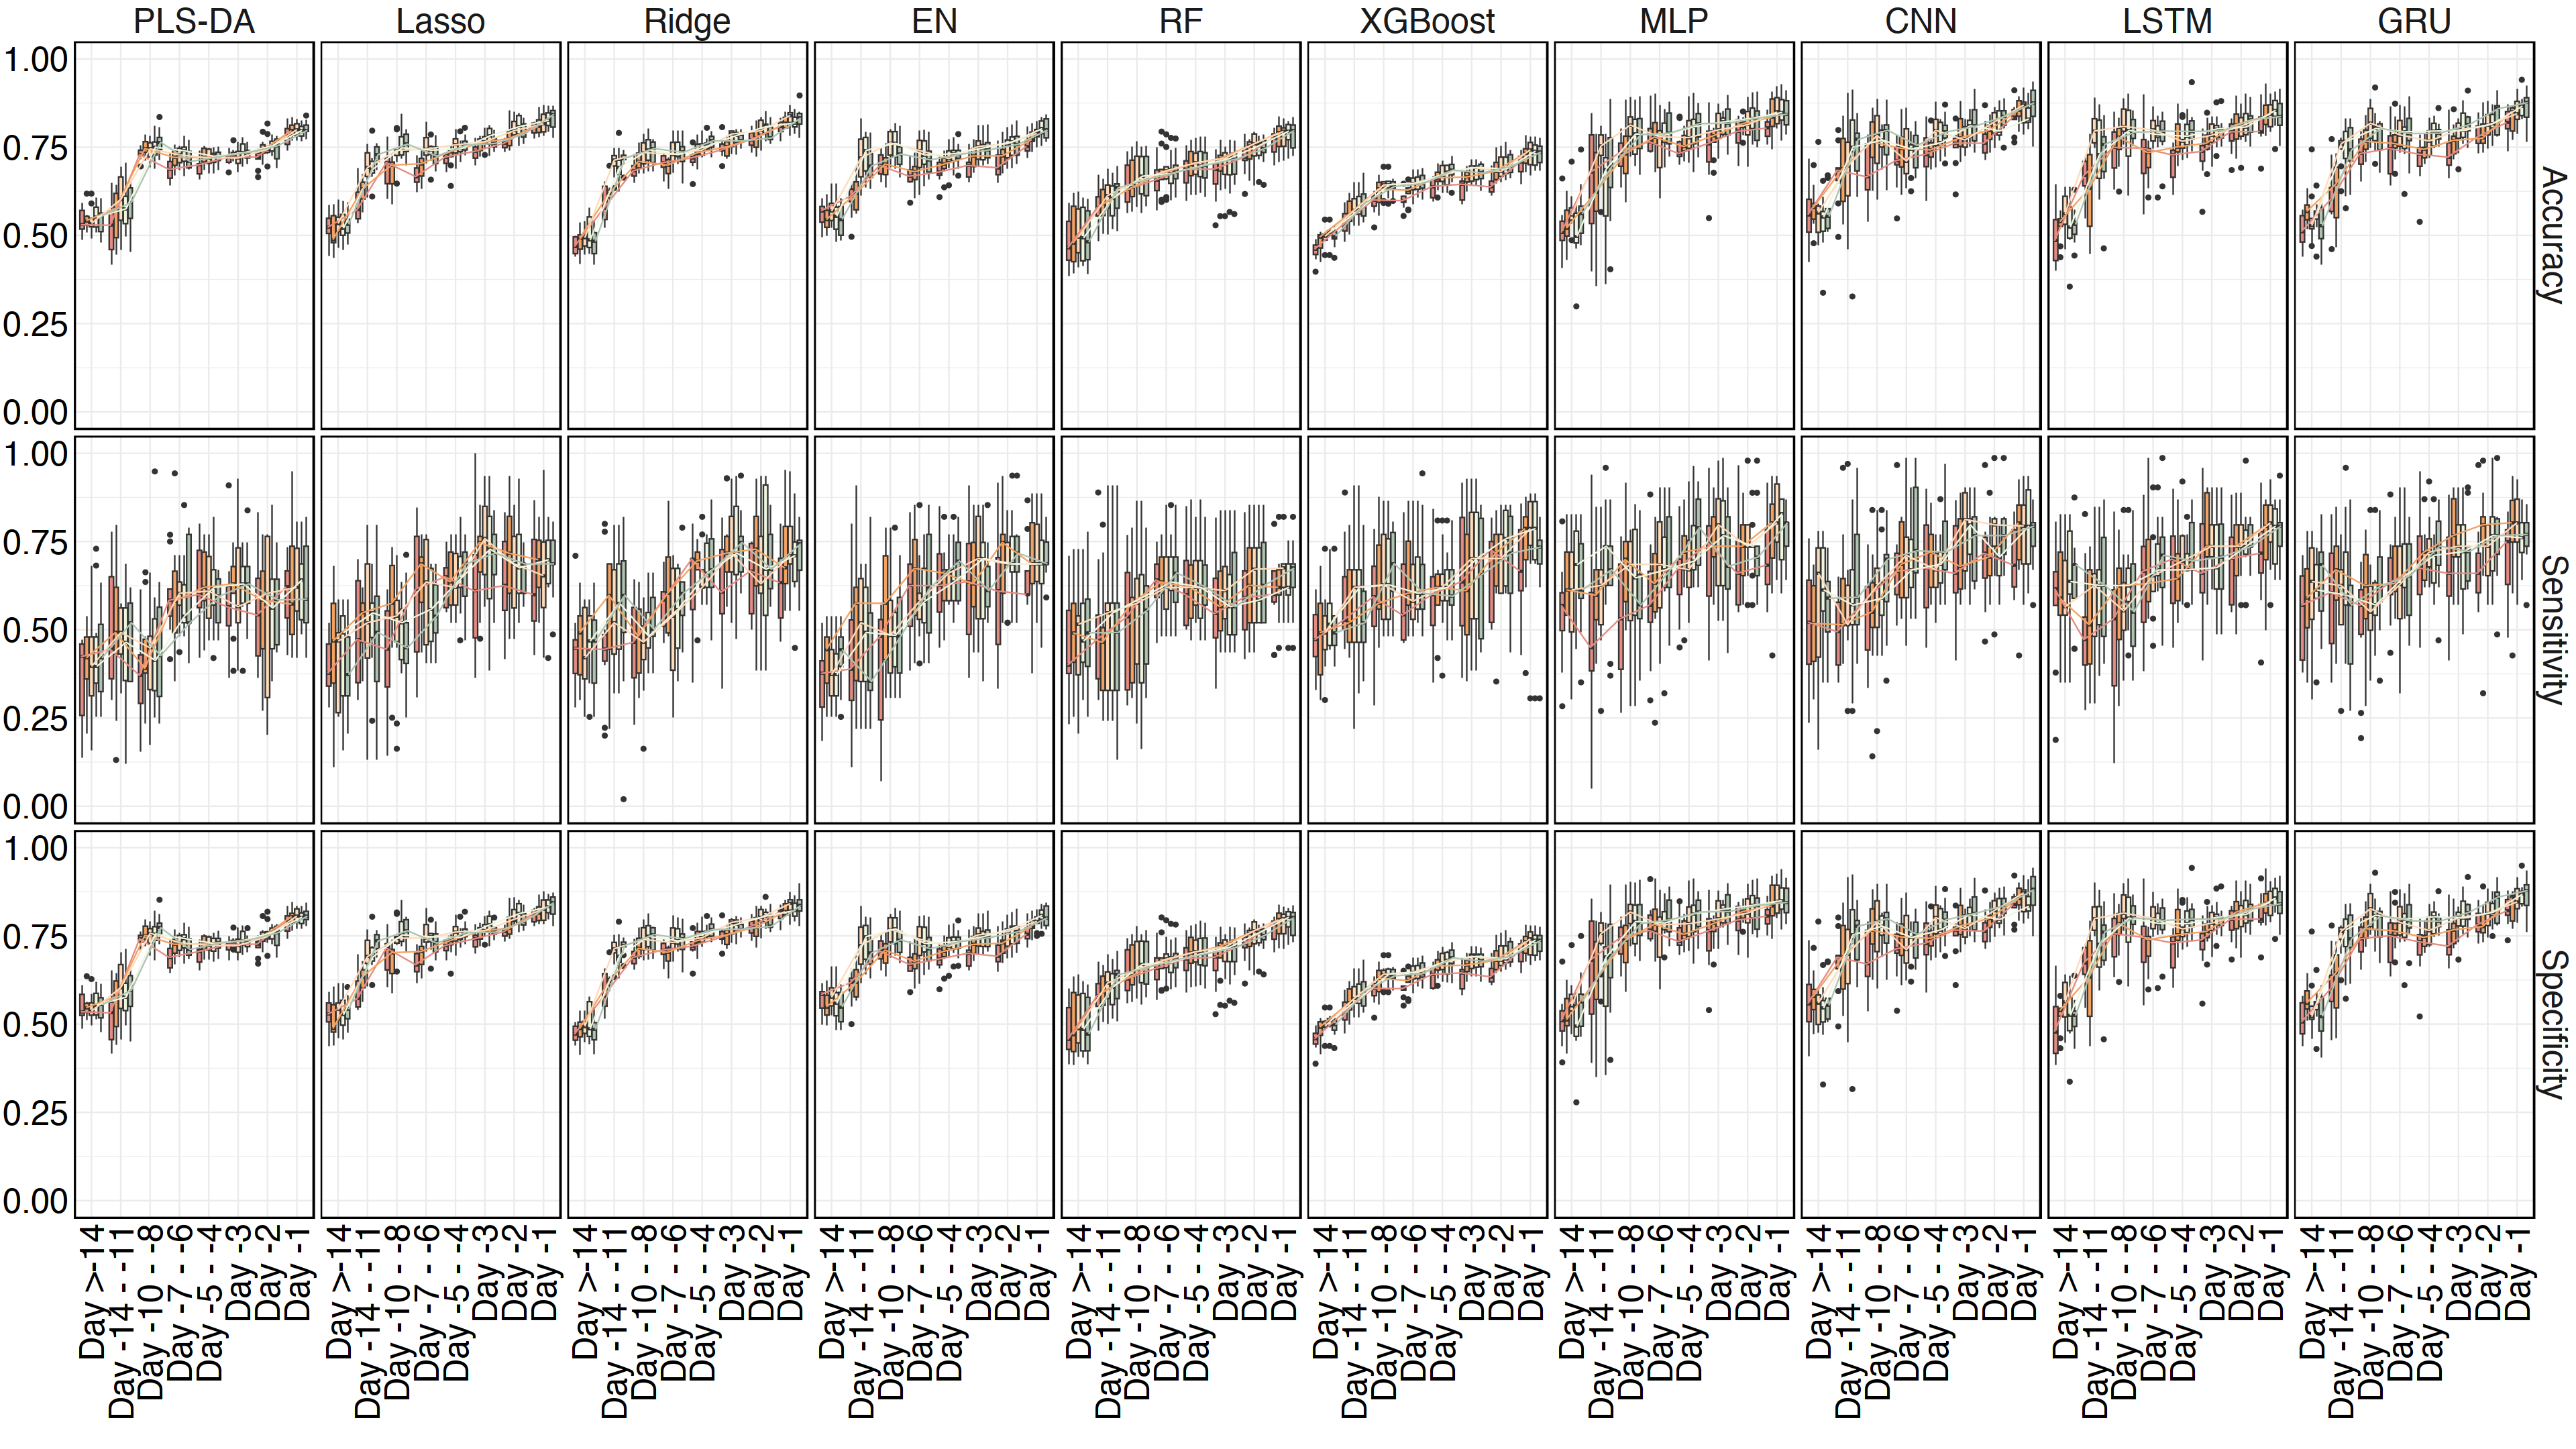

In [20]:
main_theme = theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=30),
    axis.text.y = element_text(colour = "black", size = 30, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 30, angle = 90, vjust = 0.5, hjust = 1), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 1.2),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

data <- read.csv('./results2_1031.csv', sep = ",", header = T, row.names = NULL)
data <- gather(data, key = "metrics", value ="value", -model, -para, -day)

options(repr.plot.width=32, repr.plot.height=18)
data$model <- factor(data$model, levels=c('PLS-DA', 'Lasso', 'Ridge', 'EN', 'RF', 'XGBoost', 'MLP', 'CNN', 'LSTM', 'GRU'))
data$day <- factor(data$day, levels=c("Day >-14", "Day -14 - -11", "Day -10 - -8", "Day -7 - -6", "Day -5 - -4", "Day -3", "Day -2", "Day -1"))
data$para <- factor(data$para, levels=c('whole_spc', 'whole_spc+weight', 'whole_spc+weight+cells', 'whole_spc+weight+cells+conductivity', 'whole_spc+weight+cells+conductivity+parity'))
ggplot(data, aes(x=day, y=value, fill=para)) + 
  geom_boxplot(position=position_dodge(0.8)) +
  stat_summary(fun.y = median, geom = 'line', aes(group = para, color = para), position = position_dodge(width = 0.9)) +
  scale_x_discrete(labels = c("Day >-14", "Day -14 - -11", "Day -10 - -8", "Day -7 - -6", "Day -5 - -4", "Day -3", "Day -2", "Day -1")) +
  scale_fill_manual(values=c('#E68B81', '#f4a261', '#ffdab9', '#eff6e0', '#aec3b0')) + 
  scale_color_manual(values=c('#E68B81', '#f4a261', '#ffdab9', '#eff6e0', '#aec3b0')) + 
  facet_grid(rows = vars(metrics), cols = vars(model)) +
  ylim(0, 1) +
  main_theme  

#### Figure 5B

Warning message:
“Removed 27 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 27 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 27 rows containing non-finite values (`stat_summary()`).”


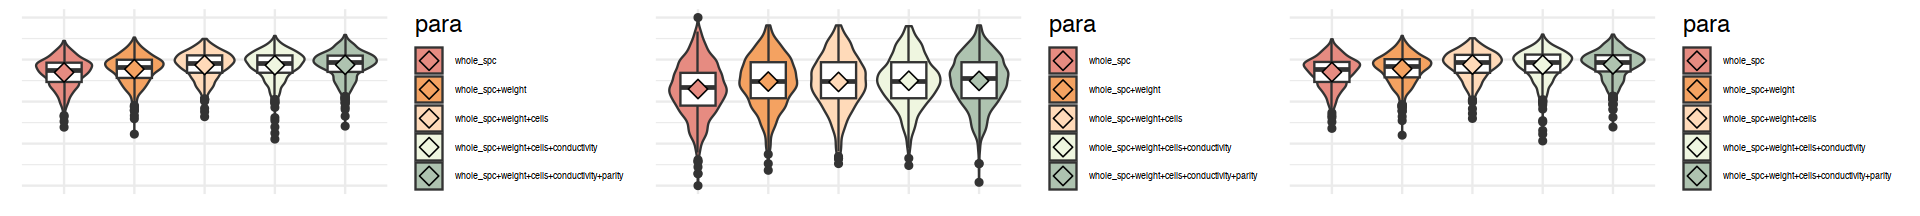

In [23]:
main_theme = theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=30),
    axis.text.y = element_text(colour = "black", size = 0, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle = 90, vjust = 0.5, hjust = 0.5), 
    legend.text = element_text(size = 5, face ="bold", colour ="black"), 
    legend.position = "right", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

data <- read.csv('./results2_1031.csv', sep = ",", header = T, row.names = NULL)
data <- gather(data, key = "metrics", value ="value", -model, -para, -day)

data_a <- data %>% filter(metrics == 'Accuracy')
data_a$para <- factor(data_a$para, levels=c('whole_spc', 'whole_spc+weight', 'whole_spc+weight+cells', 'whole_spc+weight+cells+conductivity', 'whole_spc+weight+cells+conductivity+parity'))
p1 <- ggplot(data_a, aes(x=para, y=value, fill=para)) + 
  scale_fill_manual(values=c('#E68B81', '#f4a261', '#ffdab9', '#eff6e0', '#aec3b0')) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  main_theme

data_s <- data %>% filter(metrics == 'Sensitivity')
data_s$para <- factor(data_s$para, levels=c('whole_spc', 'whole_spc+weight', 'whole_spc+weight+cells', 'whole_spc+weight+cells+conductivity', 'whole_spc+weight+cells+conductivity+parity'))
p2 <- ggplot(data_s, aes(x=para, y=value, fill=para)) + 
  scale_fill_manual(values=c('#E68B81', '#f4a261', '#ffdab9', '#eff6e0', '#aec3b0')) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  main_theme

data_s <- data %>% filter(metrics == 'Specificity')
data_s$para <- factor(data_s$para, levels=c('whole_spc', 'whole_spc+weight', 'whole_spc+weight+cells', 'whole_spc+weight+cells+conductivity', 'whole_spc+weight+cells+conductivity+parity'))
p3 <- ggplot(data_s, aes(x=para, y=value, fill=para)) + 
  scale_fill_manual(values=c('#E68B81', '#f4a261', '#ffdab9', '#eff6e0', '#aec3b0')) + 
  geom_violin() +
  geom_boxplot(width=0.5, fill="white") +
  stat_summary(fun.y=mean, geom="point", shape=23, size=4) + 
  ylim(0, 1) +
  main_theme

options(repr.plot.width=16, repr.plot.height=1.8)
p1 + p2 + p3 + plot_layout(nrow = 1)

#### Figure 5C

`summarise()` has grouped output by 'model'. You can override using the `.groups` argument.


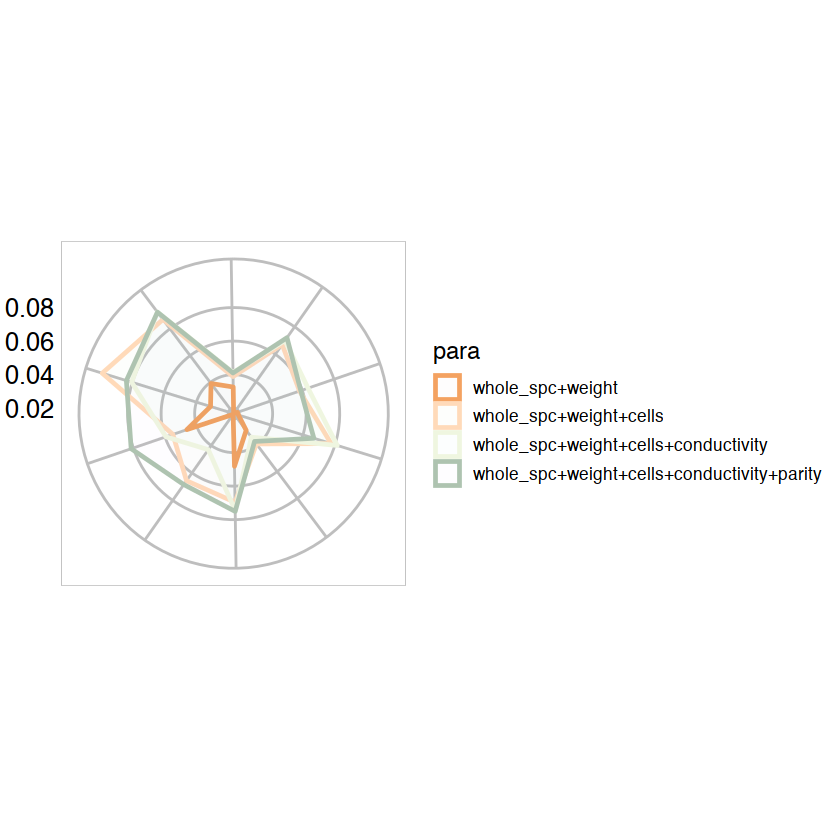

In [24]:
main_theme = theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=15),
    axis.text.y = element_text(colour = "black", size = 15, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 0, angle = 0, vjust = 0.5, hjust = 1), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "right", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.grid.major = element_line(colour = "grey", size = 0.6),
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.05),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

data <- read.csv('./results2_1031.csv', sep = ",", header = T, row.names = NULL)
data <- subset(data, select = c(Accuracy, model, para))
data <- data %>% group_by(model, para) %>% 
  summarise(mean=mean(Accuracy))

data_plsda <- data %>% filter(model == 'PLS-DA')
data_plsda$mean = (data_plsda$mean - data_plsda[data_plsda$para == 'whole_spc', 'mean', drop = TRUE])/data_plsda[data_plsda$para == 'whole_spc', 'mean', drop = TRUE] 
data_plsda <- data_plsda %>% filter(para != 'whole_spc')
data_plsda <- subset(data_plsda, select = c(para, mean))
colnames(data_plsda) <- c('para', 'value')
data_plsda$group <- 'PLS-DA'

data_lasso <- data %>% filter(model == 'Lasso')
data_lasso$mean = (data_lasso$mean - data_lasso[data_lasso$para == 'whole_spc', 'mean', drop = TRUE])/data_lasso[data_lasso$para == 'whole_spc', 'mean', drop = TRUE] 
data_lasso <- data_lasso %>% filter(para != 'whole_spc')
data_lasso <- subset(data_lasso, select = c(para, mean))
colnames(data_lasso) <- c('para', 'value')
data_lasso$group <- 'Lasso'

data_ridge <- data %>% filter(model == 'Ridge')
data_ridge$mean = (data_ridge$mean - data_ridge[data_ridge$para == 'whole_spc', 'mean', drop = TRUE])/data_ridge[data_ridge$para == 'whole_spc', 'mean', drop = TRUE] 
data_ridge <- data_ridge %>% filter(para != 'whole_spc')
data_ridge <- subset(data_ridge, select = c(para, mean))
colnames(data_ridge) <- c('para', 'value')
data_ridge$group <- 'Ridge'

data_en <- data %>% filter(model == 'EN')
data_en$mean = (data_en$mean - data_en[data_en$para == 'whole_spc', 'mean', drop = TRUE])/data_en[data_en$para == 'whole_spc', 'mean', drop = TRUE] 
data_en <- data_en %>% filter(para != 'whole_spc')
data_en <- subset(data_en, select = c(para, mean))
colnames(data_en) <- c('para', 'value')
data_en$group <- 'EN'

data_rf <- data %>% filter(model == 'RF')
data_rf$mean = (data_rf$mean - data_rf[data_rf$para == 'whole_spc', 'mean', drop = TRUE])/data_rf[data_rf$para == 'whole_spc', 'mean', drop = TRUE] 
data_rf <- data_rf %>% filter(para != 'whole_spc')
data_rf <- subset(data_rf, select = c(para, mean))
colnames(data_rf) <- c('para', 'value')
data_rf$group <- 'RF'

data_xgboost <- data %>% filter(model == 'XGBoost')
data_xgboost$mean = (data_xgboost$mean - data_xgboost[data_xgboost$para == 'whole_spc', 'mean', drop = TRUE])/data_xgboost[data_xgboost$para == 'whole_spc', 'mean', drop = TRUE] 
data_xgboost <- data_xgboost %>% filter(para != 'whole_spc')
data_xgboost <- subset(data_xgboost, select = c(para, mean))
colnames(data_xgboost) <- c('para', 'value')
data_xgboost$group <- 'XGBoost'

data_mlp <- data %>% filter(model == 'MLP')
data_mlp$mean = (data_mlp$mean - data_mlp[data_mlp$para == 'whole_spc', 'mean', drop = TRUE])/data_mlp[data_mlp$para == 'whole_spc', 'mean', drop = TRUE] 
data_mlp <- data_mlp %>% filter(para != 'whole_spc')
data_mlp <- subset(data_mlp, select = c(para, mean))
colnames(data_mlp) <- c('para', 'value')
data_mlp$group <- 'MLP'

data_cnn <- data %>% filter(model == 'CNN')
data_cnn$mean = (data_cnn$mean - data_cnn[data_cnn$para == 'whole_spc', 'mean', drop = TRUE])/data_cnn[data_cnn$para == 'whole_spc', 'mean', drop = TRUE] 
data_cnn <- data_cnn %>% filter(para != 'whole_spc')
data_cnn <- subset(data_cnn, select = c(para, mean))
colnames(data_cnn) <- c('para', 'value')
data_cnn$group <- 'CNN'

data_lstm <- data %>% filter(model == 'LSTM')
data_lstm$mean = (data_lstm$mean - data_lstm[data_lstm$para == 'whole_spc', 'mean', drop = TRUE])/data_lstm[data_lstm$para == 'whole_spc', 'mean', drop = TRUE] 
data_lstm <- data_lstm %>% filter(para != 'whole_spc')
data_lstm <- subset(data_lstm, select = c(para, mean))
colnames(data_lstm) <- c('para', 'value')
data_lstm$group <- 'LSTM'

data_gru <- data %>% filter(model == 'GRU')
data_gru$mean = (data_gru$mean - data_gru[data_gru$para == 'whole_spc', 'mean', drop = TRUE])/data_gru[data_gru$para == 'whole_spc', 'mean', drop = TRUE] 
data_gru <- data_gru %>% filter(para != 'whole_spc')
data_gru <- subset(data_gru, select = c(para, mean))
colnames(data_gru) <- c('para', 'value')
data_gru$group <- 'GRU'

data <- rbind(data_plsda, data_lasso, data_ridge, data_en, data_rf, data_xgboost, data_mlp, data_cnn, data_lstm, data_gru)
data$group <- factor(data$group, levels=c('PLS-DA', 'Lasso', 'Ridge', 'EN', 'RF', 'XGBoost', 'MLP', 'CNN', 'LSTM', 'GRU'))
data$model <- factor(data$para, levels=c('whole_spc+weight', 'whole_spc+weight+cells', 'whole_spc+weight+cells+conductivity', 'whole_spc+weight+cells+conductivity+parity'))
options(repr.plot.width=7, repr.plot.height=7)
ggplot(data, aes(x = group, y = value, color = para, group = para)) +
  geom_polygon(aes(fill = para), size = 1, alpha = 0.01, linewidth = 1) + 
  coord_radar(start = -0.33) +  
  scale_color_manual(values=c('#f4a261', '#ffdab9', '#eff6e0', '#aec3b0')) + 
  main_theme

#### Figure 6

`summarise()` has grouped output by 'model'. You can override using the `.groups` argument.


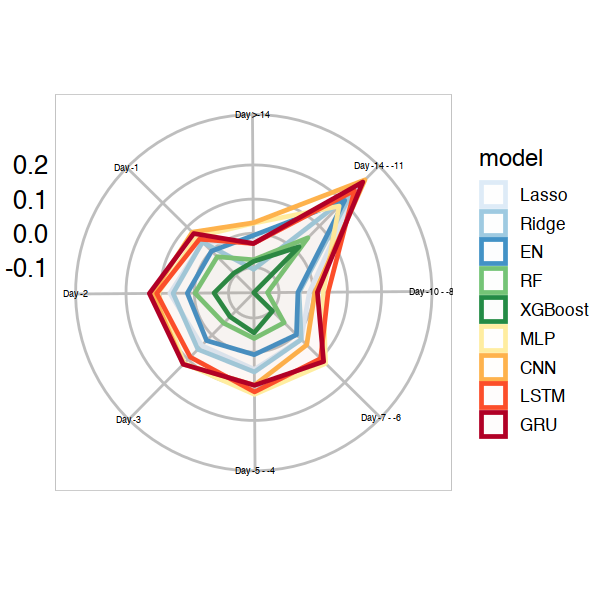

In [25]:
main_theme = theme_minimal() + 
    theme(
    plot.title = element_text(color="black", size=0, face="bold"),
    strip.text = element_text(size=15),
    axis.text.y = element_text(colour = "black", size = 15, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 5, angle = 0, vjust = 0.5, hjust = 1), 
    legend.text = element_text(size = 10, face ="bold", colour ="black"), 
    legend.position = "right", 
    axis.title.y = element_text(face = "bold", size = 0), 
    axis.title.x = element_text(face = "bold", size = 0, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.grid.major = element_line(colour = "grey", size = 0.6),
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0.05),
    legend.key=element_blank(),
    plot.margin = unit(c(0,0,0,0), "cm"))

data <- read.csv('./results2_1031.csv', sep = ",", header = T, row.names = NULL)
data <- data %>% filter(para == 'whole_spc+weight+cells+conductivity+parity')
data <- subset(data, select = c(Accuracy, model, day))
colnames(data) <- c('value', 'model', 'day')
data <- data %>% group_by(model, day) %>% 
  summarise(mean=mean(value))

data_14 <- data %>% filter(day == 'Day >-14')
data_14$mean = (data_14$mean - data_14[data_14$model == 'PLS-DA', 'mean', drop = TRUE])/data_14[data_14$model == 'PLS-DA', 'mean', drop = TRUE] 
data_14 <- data_14 %>% filter(model != 'PLS-DA')
data_14 <- subset(data_14, select = c(model, mean))
colnames(data_14) <- c('model', 'value')
data_14$group <- 'Day >-14'

data_11 <- data %>% filter(day == 'Day -14 - -11')
data_11$mean = (data_11$mean - data_11[data_11$model == 'PLS-DA', 'mean', drop = TRUE])/data_11[data_11$model == 'PLS-DA', 'mean', drop = TRUE] 
data_11 <- data_11 %>% filter(model != 'PLS-DA')
data_11 <- subset(data_11, select = c(model, mean))
colnames(data_11) <- c('model', 'value')
data_11$group <- 'Day -14 - -11'

data_8 <- data %>% filter(day == 'Day -10 - -8')
data_8$mean = (data_8$mean - data_8[data_8$model == 'PLS-DA', 'mean', drop = TRUE])/data_8[data_8$model == 'PLS-DA', 'mean', drop = TRUE] 
data_8 <- data_8 %>% filter(model != 'PLS-DA')
data_8 <- subset(data_8, select = c(model, mean))
colnames(data_8) <- c('model', 'value')
data_8$group <- 'Day -10 - -8'

data_6 <- data %>% filter(day == 'Day -7 - -6')
data_6$mean = (data_6$mean - data_6[data_6$model == 'PLS-DA', 'mean', drop = TRUE])/data_6[data_6$model == 'PLS-DA', 'mean', drop = TRUE] 
data_6 <- data_6 %>% filter(model != 'PLS-DA')
data_6 <- subset(data_6, select = c(model, mean))
colnames(data_6) <- c('model', 'value')
data_6$group <- 'Day -7 - -6'

data_4 <- data %>% filter(day == 'Day -5 - -4')
data_4$mean = (data_4$mean - data_4[data_4$model == 'PLS-DA', 'mean', drop = TRUE])/data_4[data_4$model == 'PLS-DA', 'mean', drop = TRUE] 
data_4 <- data_4 %>% filter(model != 'PLS-DA')
data_4 <- subset(data_4, select = c(model, mean))
colnames(data_4) <- c('model', 'value')
data_4$group <- 'Day -5 - -4'

data_3 <- data %>% filter(day == 'Day -3')
data_3$mean = (data_3$mean - data_3[data_3$model == 'PLS-DA', 'mean', drop = TRUE])/data_3[data_3$model == 'PLS-DA', 'mean', drop = TRUE] 
data_3 <- data_3 %>% filter(model != 'PLS-DA')
data_3 <- subset(data_3, select = c(model, mean))
colnames(data_3) <- c('model', 'value')
data_3$group <- 'Day -3'

data_2 <- data %>% filter(day == 'Day -2')
data_2$mean = (data_2$mean - data_2[data_2$model == 'PLS-DA', 'mean', drop = TRUE])/data_2[data_2$model == 'PLS-DA', 'mean', drop = TRUE] 
data_2 <- data_2 %>% filter(model != 'PLS-DA')
data_2 <- subset(data_2, select = c(model, mean))
colnames(data_2) <- c('model', 'value')
data_2$group <- 'Day -2'

data_1 <- data %>% filter(day == 'Day -1')
data_1$mean = (data_1$mean - data_1[data_1$model == 'PLS-DA', 'mean', drop = TRUE])/data_1[data_1$model == 'PLS-DA', 'mean', drop = TRUE] 
data_1 <- data_1 %>% filter(model != 'PLS-DA')
data_1 <- subset(data_1, select = c(model, mean))
colnames(data_1) <- c('model', 'value')
data_1$group <- 'Day -1'

data <- rbind(data_14, data_11, data_8, data_6, data_4, data_3, data_2, data_1)
data$group <- factor(data$group, levels=c("Day >-14", "Day -14 - -11", "Day -10 - -8", "Day -7 - -6", "Day -5 - -4", "Day -3", "Day -2", "Day -1"))
data$model <- factor(data$model, levels=c('Lasso', 'Ridge', 'EN', 'RF', 'XGBoost', 'MLP', 'CNN', 'LSTM', 'GRU'))
options(repr.plot.width=5, repr.plot.height=5)
ggplot(data, aes(x = group, y = value, color = model, group = model)) +
  geom_polygon(aes(fill = model), size = 1, alpha = 0.01, linewidth = 1) + 
  coord_radar(start = -0.40) +  
  scale_fill_manual(values=c('#DEEBF7', '#9ECAE1', '#4292C6', '#74C476', '#238B45', '#FFEDA0', '#FEB24C', '#FC4E2A', '#B10026')) + 
  scale_color_manual(values=c('#DEEBF7', '#9ECAE1', '#4292C6', '#74C476', '#238B45', '#FFEDA0', '#FEB24C', '#FC4E2A', '#B10026')) + 
  main_theme

#### Figure 7A

Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”
Warning message in which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < :
“NAs introduced by coercion”


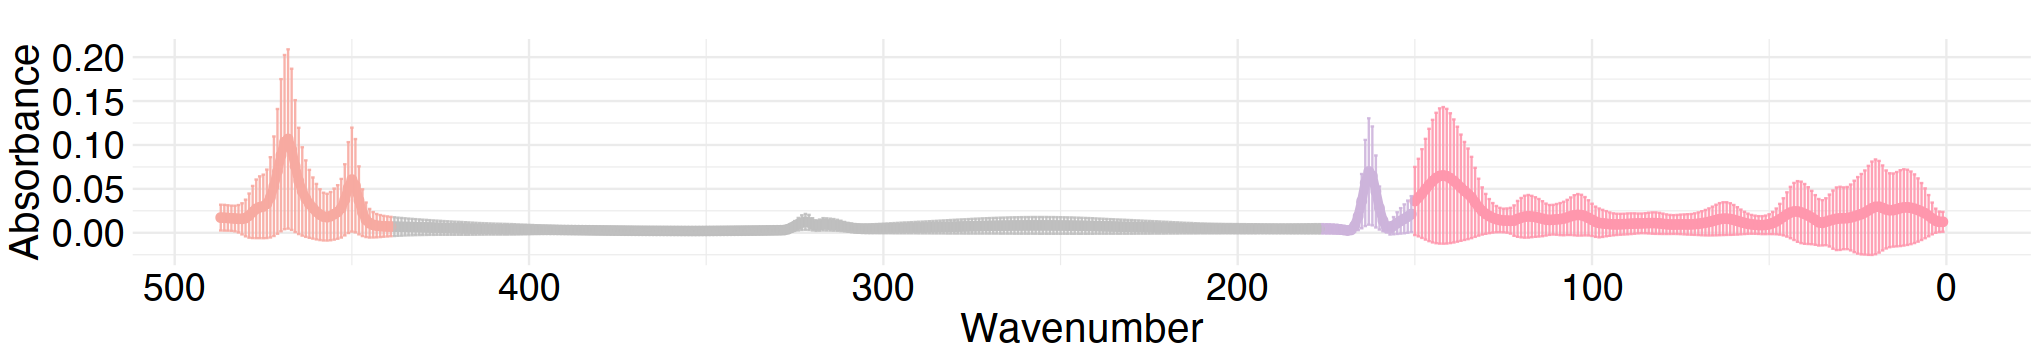

In [26]:
main_theme = theme_minimal() + 
    theme(strip.text = element_text(size=20),
    axis.text.y = element_text(colour = "black", size = 22, face = "bold"), 
    axis.text.x = element_text(colour = "black", face = "bold", size = 22), 
    legend.text = element_text(size = 18, face ="bold", colour ="black"), 
    legend.position = "none", 
    axis.title.y = element_text(face = "bold", size = 24), 
    axis.title.x = element_text(face = "bold", size = 24, colour = "black"), 
    legend.title = element_text(size = 14, colour = "black", face = "bold"), 
    panel.background = element_blank(), 
    panel.border = element_rect(colour = "black", fill = NA, size = 0),
    legend.key=element_blank()) 

spc_s <- spc
spc_filtered <- spc_s[, which(as.numeric(colnames(spc_s)) > 1000 & as.numeric(colnames(spc_s)) < 3000)]
spc_filtered <- spc_filtered[, which(as.numeric(colnames(spc_filtered)) < 1580 | as.numeric(colnames(spc_filtered)) > 1700)]
spc_filtered <- t(center_scale(t(spc_filtered))) %>% as.data.frame()
spc_filtered$vial <- spc_s$vial
spc_filtered <- cbind(spc_filtered, spc_s[,937:953])
spc_filtered <- spc_filtered %>% filter(!vial %in% spc_filtered_id)

spc_filtered_d <- spc_filtered %>% filter(disease == 1)
spc_filtered_d <- spc_filtered_d[,1:487]

spc_filtered_h <- spc_filtered %>% filter(disease == 0)
spc_filtered_h <- spc_filtered_h[,1:487]
spc_filtered_h <- spc_filtered_h[sample(1:nrow(spc_filtered_h), nrow(spc_filtered_d)),]

differences <- abs(spc_filtered_h - spc_filtered_d)
mean_diff <- colMeans(differences)
sd_diff <- apply(differences, 2, sd)

differences <- data.frame(spc = c(as.numeric(colnames(spc_filtered_d))), mean = c(mean_diff), sd = c(sd_diff))
differences <- differences[!(as.numeric(rownames(differences)) > 1585 & as.numeric(rownames(differences)) < 1700), ]
differences$region <- 'R4'
differences <- differences %>% mutate(region = ifelse(spc > 2810 & spc < 3000, "R1", region))
differences <- differences %>% mutate(region = ifelse(spc > 1700 & spc < 1800, "R2", region))
differences <- differences %>% mutate(region = ifelse(spc > 1000 & spc < 1585, "R3", region))
differences <- differences %>% mutate(region = ifelse(spc > 1800 & spc < 2800, "R4", region))
differences$region <- factor(differences$region, levels=c('R1', 'R4', 'R2', 'R3'))
differences$rank <- seq(1, 487)
options(repr.plot.width=17, repr.plot.height=3)
ggplot(differences, aes(x=rank, y=mean, color=region)) + 
   geom_line(position=pd, size = 2) +
   geom_point(position=pd, size=2) +
   geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=1, alpha = 0.9) +
    scale_color_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    labs(x = 'Wavenumber', y = 'Absorbance', title = "") +
    scale_x_reverse() +
    main_theme

#### Figure 7B

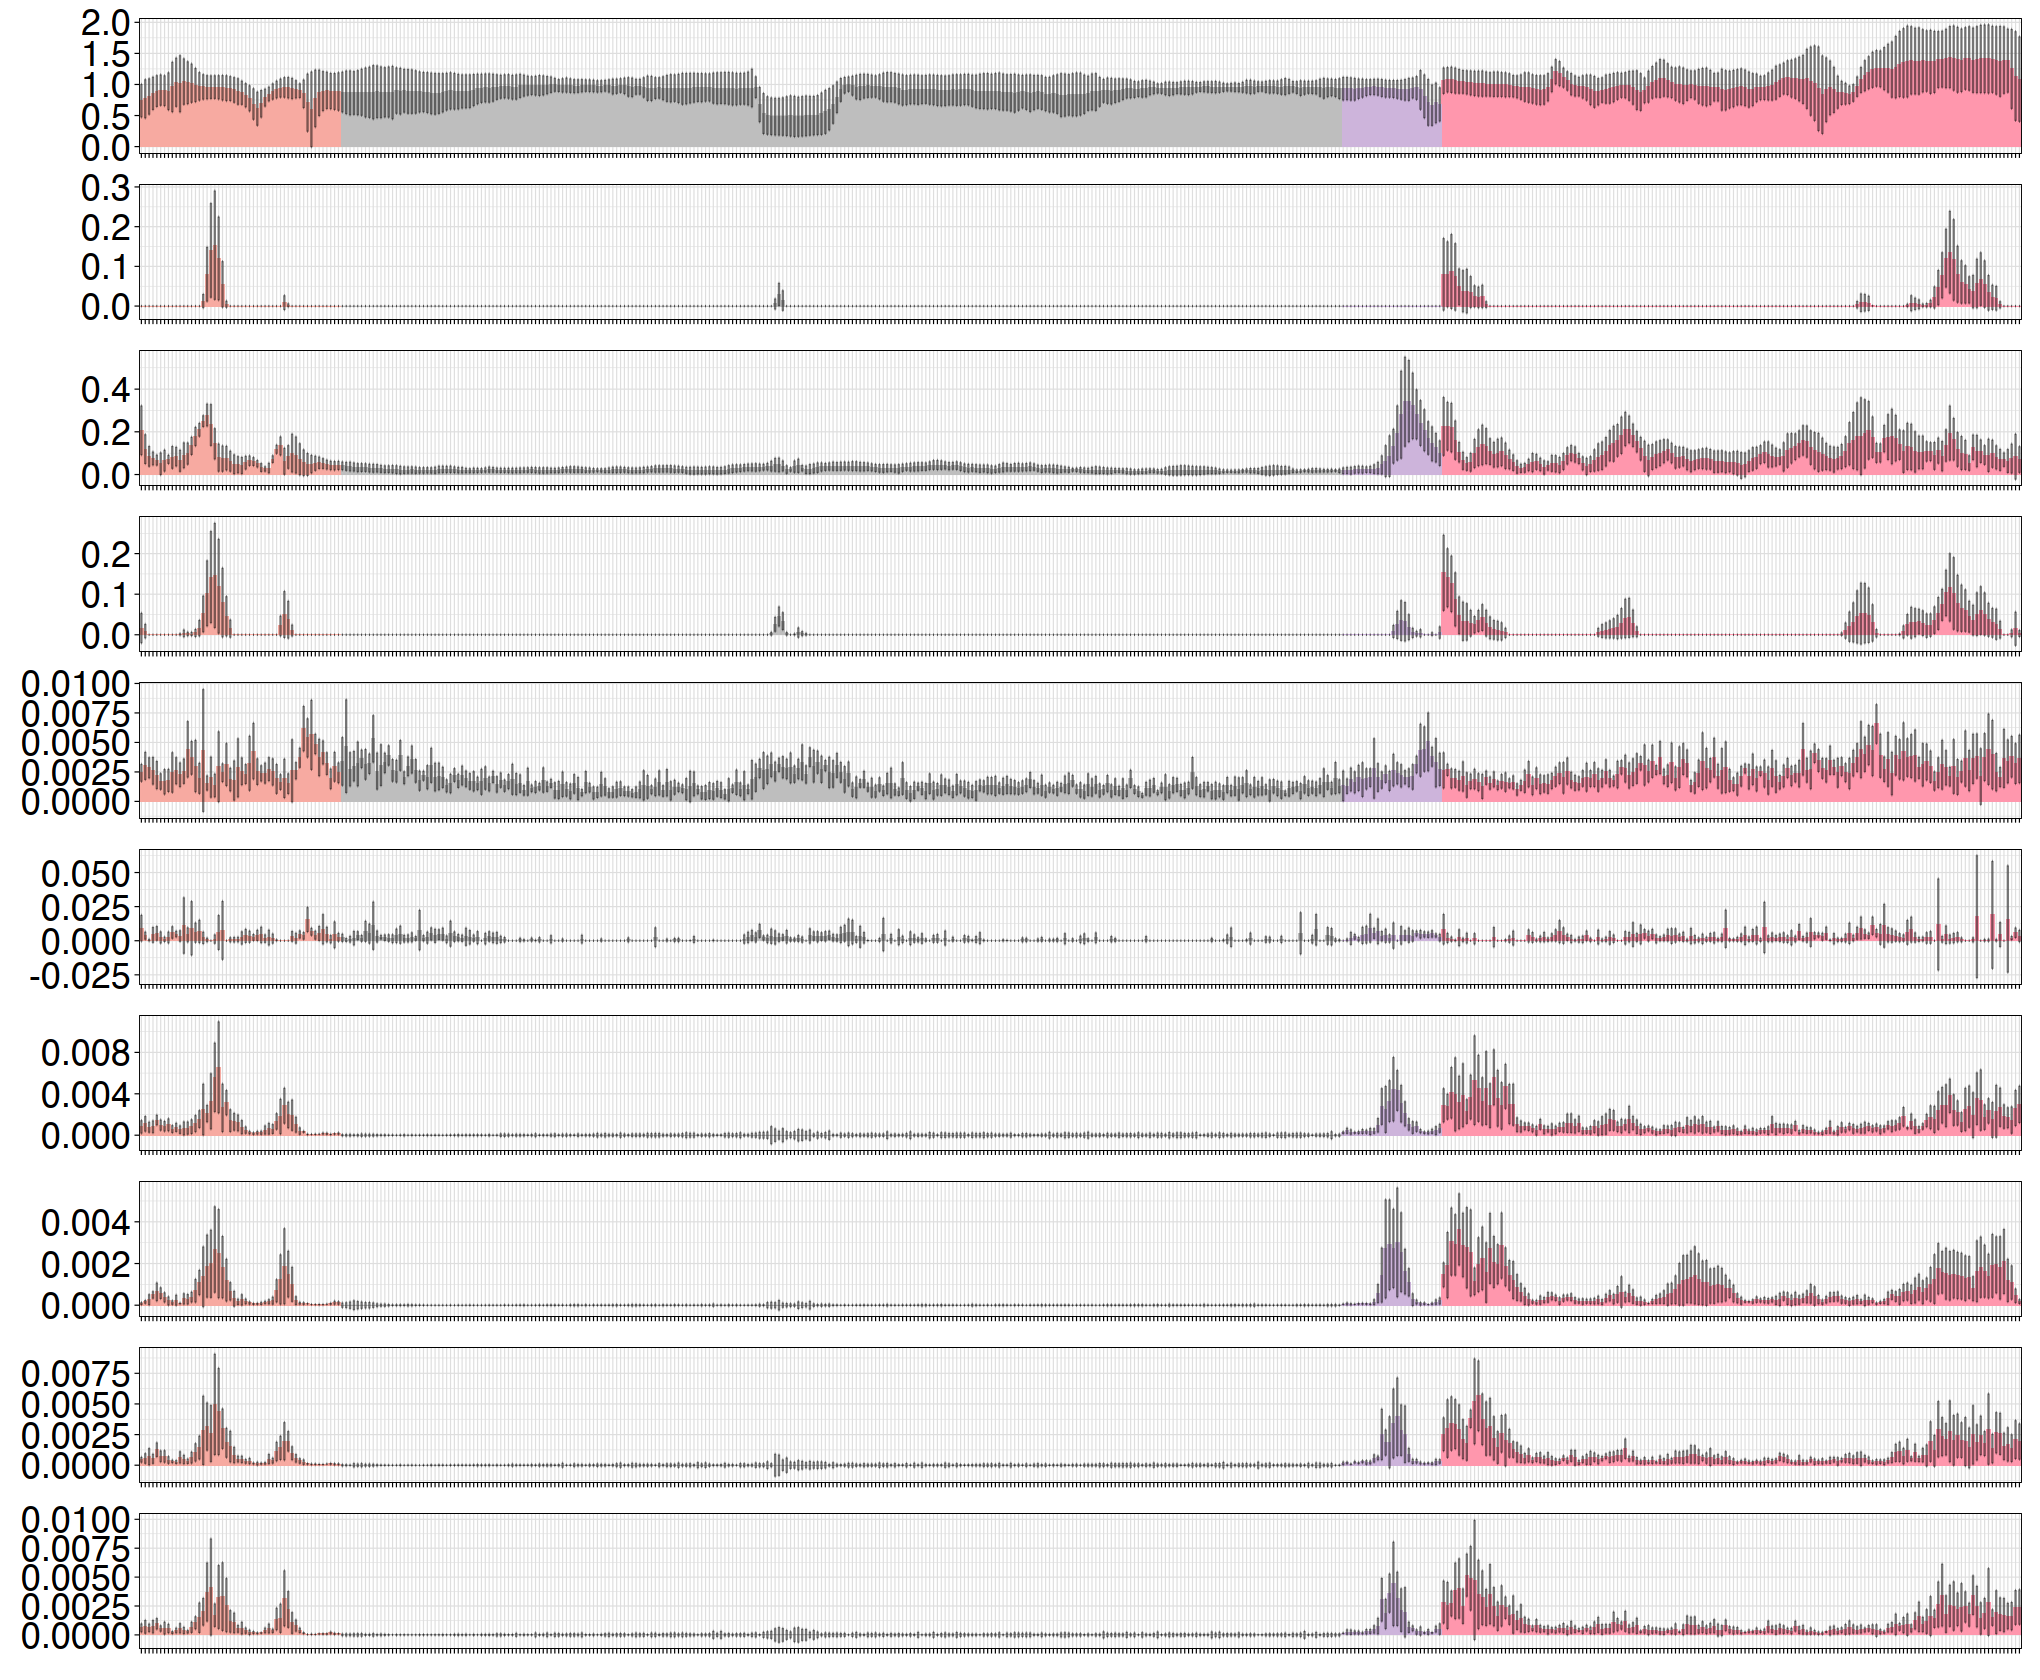

In [27]:
main_theme = theme_light() +
  theme(legend.position = "none",
        plot.title = element_text(size = 22),
        axis.title.x = element_text(size = 0, color = "black", hjust = 0.5),
        axis.title.y = element_text(size = 0,color = "black", hjust = 0.5),
        axis.ticks = element_line(color = "black"), 
        axis.text.y = element_text(color = "black", size = 21),
        axis.text.x = element_text(color = "black", size = 0),
        panel.border = element_rect(colour = "black", fill = NA, size = 0.2)) 

data <- read.csv('./imp1.csv', sep = ",", header = T, row.names = NULL)

data_imp <- data %>% filter(model == 'PLS-DA')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'PLS-DA'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p1 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'Lasso')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'Lasso'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p2 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'Ridge')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'Ridge'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p3 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'EN')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'EN'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p4 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'RF')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'RF'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p5 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'XGBoost')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'XGBoost'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p6 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'MLP')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'MLP'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p7 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'CNN')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'CNN'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p8 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'LSTM')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'LSTM'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p9 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
    geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

data_imp <- data %>% filter(model == 'GRU')
data_imp$variable <- as.numeric(as.character(data_imp$variable))
data_imp <- data_imp %>% group_by(variable) %>% 
   summarise(imp_mean=mean(imp), imp_sd=sd(imp))
data_imp$model <- 'GRU'
data_imp$region <- 'R'
data_imp <- data_imp %>% mutate(region = ifelse(variable > 2800 & variable < 3000, "R1", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1700 & variable < 1800, "R2", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1000 & variable < 1585, "R3", region))
data_imp <- data_imp %>% mutate(region = ifelse(variable > 1800 & variable < 2800, "R4", region))
data_imp$variable <- factor(data_imp$variable, levels=c(rev(data_imp$variable[1: (length(data_imp$variable))])))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
pd <- position_dodge(0.1)
p10 <- ggplot(data_imp, aes(x=variable, y=imp_mean, fill=region)) + 
    geom_bar(stat="identity", position=position_dodge()) +
  geom_errorbar(aes(ymin=imp_mean-imp_sd, ymax=imp_mean+imp_sd), alpha = 0.5, width=.2, position=position_dodge(.9)) +
    scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD')) + 
    main_theme

options(repr.plot.width=17, repr.plot.height=14)
p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8 + p9 + p10 + plot_layout(nrow = 10)

#### Figure 7C

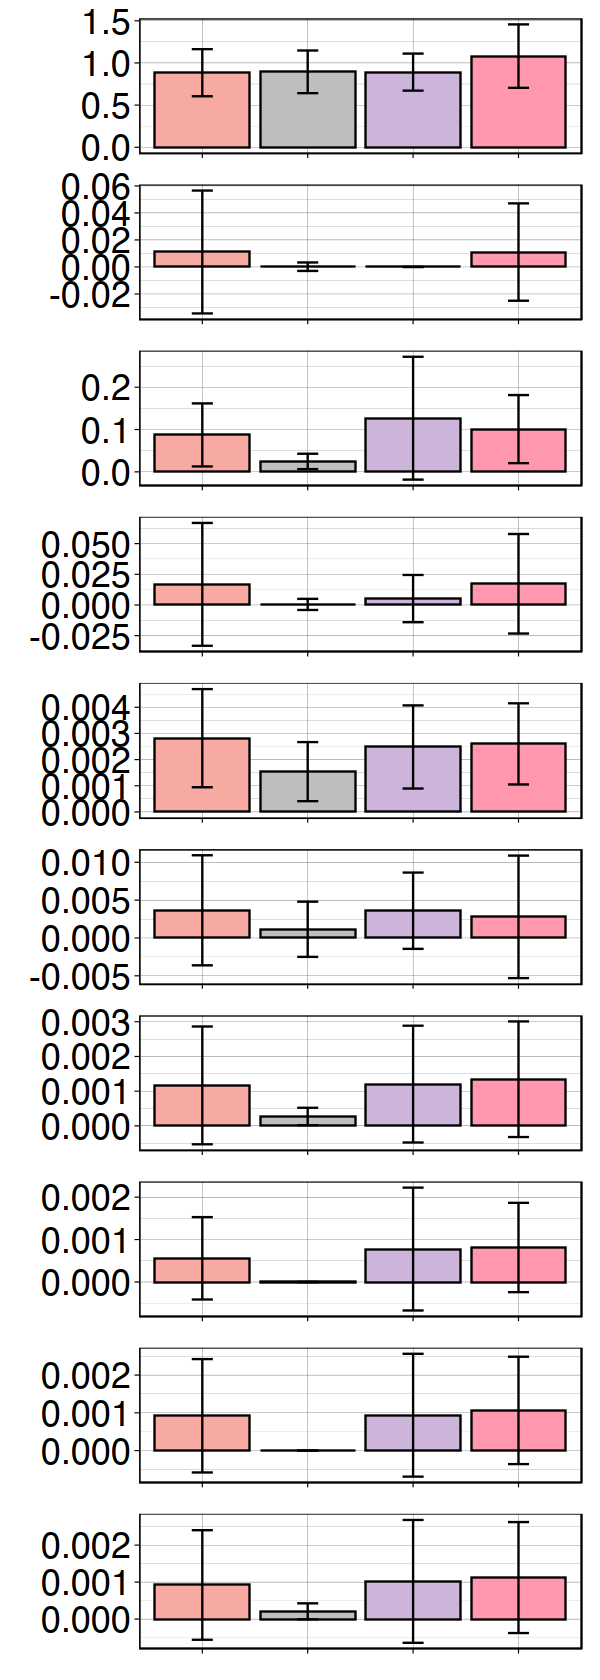

In [28]:
main_theme = theme_linedraw() +
  theme(legend.position = "none",
        plot.title = element_text(size = 22),
        axis.title.x = element_text(size = 0, color = "black", hjust = 0.5),
        axis.title.y = element_text(size = 0,color = "black", hjust = 0.5),
        axis.ticks = element_line(color = "black"), 
        axis.text.y = element_text(color = "black", size = 21),
        axis.text.x = element_text(color = "black", size = 0)) 

data <- read.csv('./imp1.csv', sep = ",", header = T, row.names = NULL)

data_imp_sp <- data %>% filter(model == 'PLS-DA')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p1 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'Lasso')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p2 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'Ridge')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p3 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'EN')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p4 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'RF')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p5 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'XGBoost')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p6 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'MLP')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p7 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'CNN')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p8 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'LSTM')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p9 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

data_imp_sp <- data %>% filter(model == 'GRU')
data_imp_sp$variable <- as.numeric(as.character(data_imp_sp$variable))
data_imp_sp1 <- data_imp_sp %>% filter(variable > 2800 & variable < 3000)
data_imp_sp2 <- data_imp_sp %>% filter(variable > 1700 & variable < 1800)
data_imp_sp3 <- data_imp_sp %>% filter(variable > 1000 & variable < 1585)
data_imp_sp4 <- data_imp_sp %>% filter(variable > 1800 & variable < 2800)
data_imp <- data.frame(region = c("R1", "R2","R3", "R4"),
           mean = c(mean(data_imp_sp1$imp), mean(data_imp_sp2$imp), mean(data_imp_sp3$imp), mean(data_imp_sp4$imp)),
           sd = c(sd(data_imp_sp1$imp), sd(data_imp_sp2$imp), sd(data_imp_sp3$imp), sd(data_imp_sp4$imp)))
data_imp$region <- factor(data_imp$region, levels=c('R1', 'R4', 'R2', 'R3'))
p10 <- ggplot(data_imp, aes(x=region, y=mean, fill=region)) + 
  geom_bar(stat="identity", position=position_dodge(), color = 'black') +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2, position=position_dodge(.9)) +
  scale_fill_manual(values=c('#F7AAA1', 'grey', '#cdb4db', '#FF97AD', '#EAAA60', '#7DA6C6')) + 
  main_theme

options(repr.plot.width=5, repr.plot.height=14)
p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8 + p9 + p10 + plot_layout(nrow = 10)